In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/moveinsync/task2.txt
/kaggle/input/moveinsync/test2.csv
/kaggle/input/moveinsync/train2.csv


# Problem Statement
A company plans to expand into new markets with five existing products. Based on market research, the new market's behavior is expected to resemble their current market.

In their current market, customers are divided into four segments (A, B, C, D), and targeted outreach for each segment has proven effective. The company now wants to apply the same segmentation strategy to 2,627 potential customers in the new market.

Your task is to assist in predicting the appropriate segment for each new customer.

Output should be filled csv file(test2.csv).


In [90]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
# Step 1: Load the dataset
train_data = pd.read_csv("/kaggle/input/moveinsync/train2.csv")  # Replace with the path to your train file
test_data = pd.read_csv("/kaggle/input/moveinsync/test2.csv")   # Replace with the path to your test file

# Data Exploration

In [92]:
print("First 10 rows of the dataset:")
train_data.head(10)

First 10 rows of the dataset:


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [93]:
print("First 10 rows of the dataset:")
test_data.head(10)

First 10 rows of the dataset:


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,NaN
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,NaN
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,NaN
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,NaN
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,NaN
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4,NaN
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6,NaN
7,459008,Female,Yes,47,Yes,Artist,1.0,Average,3.0,Cat_6,NaN
8,459013,Male,Yes,50,Yes,Artist,2.0,Average,4.0,Cat_6,NaN
9,459014,Male,No,19,No,Healthcare,0.0,Low,4.0,Cat_6,NaN


In [94]:
print("\nSummary of the dataset:")
train_data.info()


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


# Summary
1. Number of Entries: 8,068 rows
2. Columns and Data Types:
    1. ID, Age, Work_Experience, Family_Size:   Numerical features (int64 or float64).
    1. Gender, Ever_Married, Graduated, Profession, Spending_Score, Var_1, Segmentation:     Categorical features (object type).

In [95]:
train_data = train_data.loc[train_data.isnull().sum(axis=1)<3]


Distribution of segments:
Segmentation
D    2261
C    1968
A    1965
B    1855
Name: count, dtype: int64


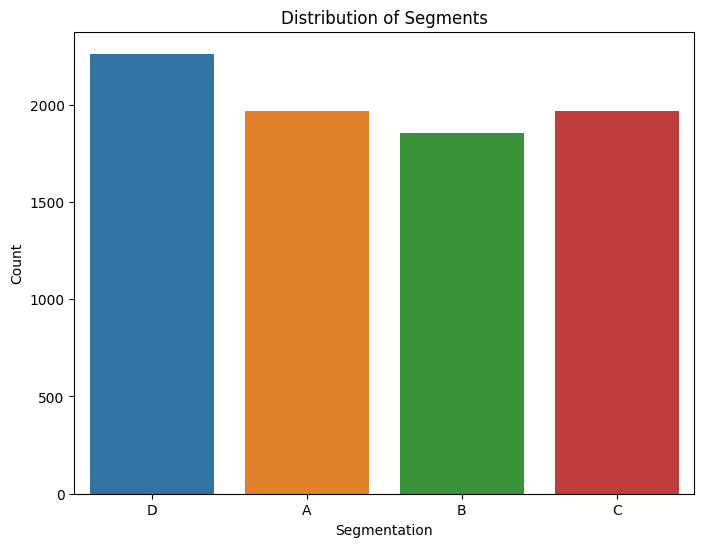

In [96]:
if 'Segmentation' in train_data.columns:
    print("\nDistribution of segments:")
    print(train_data['Segmentation'].value_counts())

    # Visualize segment distribution
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Segmentation', data=train_data)
    plt.title("Distribution of Segments")
    plt.xlabel("Segmentation")
    plt.ylabel("Count")
    plt.show()
else:
    print("\n'Segment' column not found in the dataset.")

# The distribution is uniform enough to ensure models generalize well across all segments.

In [97]:
# 2. Check for Missing Values
missing_values = train_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
ID                   0
Gender               0
Ever_Married       134
Age                  0
Graduated           72
Profession         113
Work_Experience    813
Spending_Score       0
Family_Size        320
Var_1               72
Segmentation         0
dtype: int64


In [98]:
# 2. Check for Missing Values
missing_values1 = test_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values1)


Missing values in each column:
ID                    0
Gender                0
Ever_Married         50
Age                   0
Graduated            24
Profession           38
Work_Experience     269
Spending_Score        0
Family_Size         113
Var_1                32
Segmentation       2627
dtype: int64


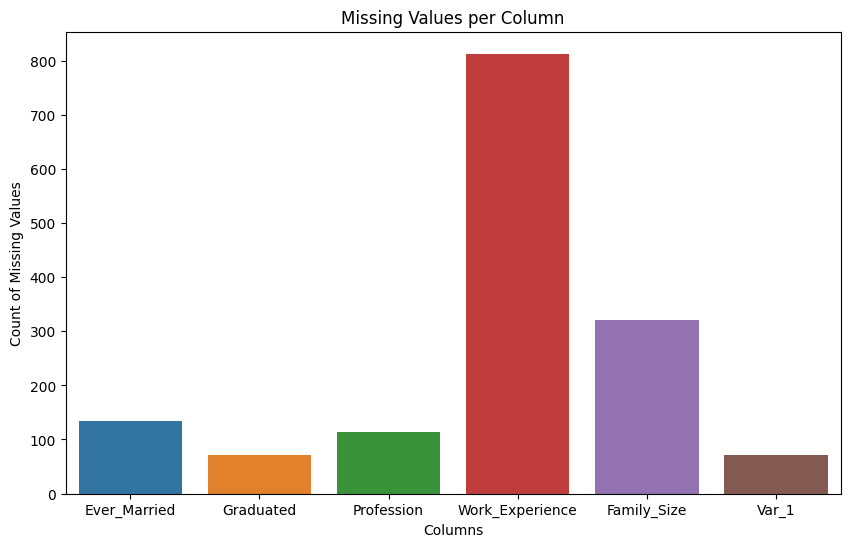

In [99]:
# Plot missing values
missing_values = missing_values[missing_values > 0]
if not missing_values.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_values.index, y=missing_values.values)
    plt.title("Missing Values per Column")
    plt.ylabel("Count of Missing Values")
    plt.xlabel("Columns")
    plt.show()
else:
    print("\nNo missing values detected.")

# Gender

In [100]:
print('The count of gender\n',train_data.Gender.value_counts())

The count of gender
 Gender
Male      4409
Female    3640
Name: count, dtype: int64


In [101]:
train_data.Gender.isnull().sum()

0

In [102]:
test_data.Gender.isnull().sum()

0

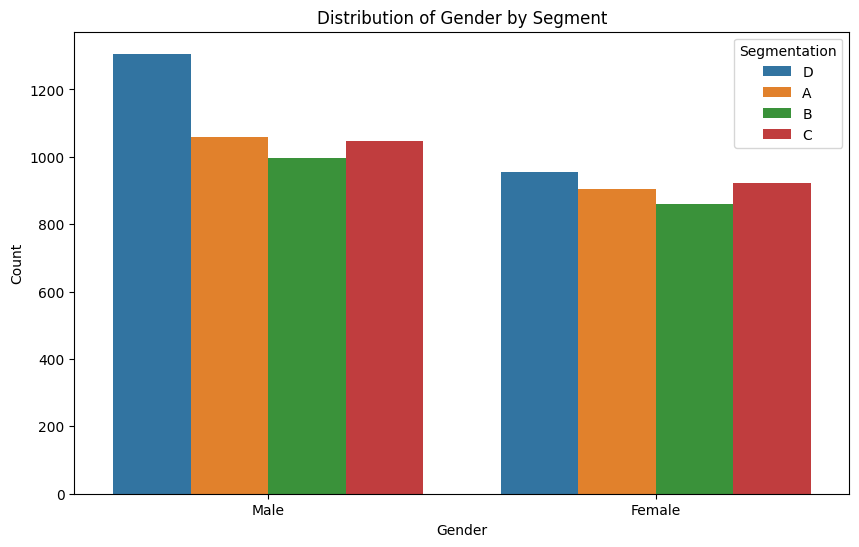

In [103]:
# 7. Categorical Feature Analysis
categorical_cols = ['Gender']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Segmentation', data=train_data)
    plt.title(f"Distribution of {col} by Segment")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

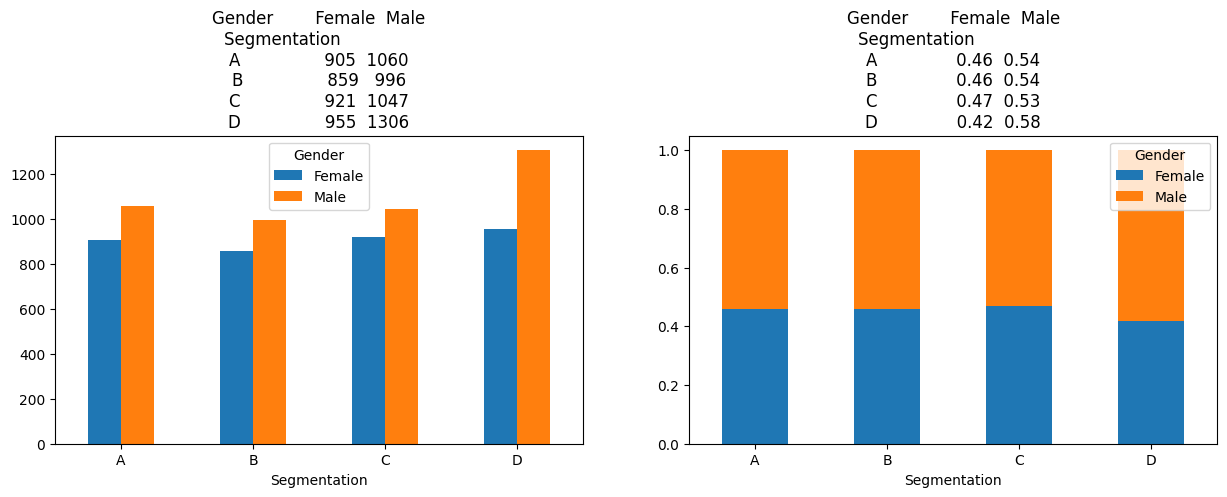

In [104]:
# Counting male-female in each segment
ax1 = train_data.groupby(["Segmentation"])["Gender"].value_counts().unstack().round(3)

ax2 = train_data.pivot_table(columns='Gender',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

# Ever_Married

In [105]:
print('Count of married vs not married\n',train_data.Ever_Married.value_counts())

Count of married vs not married
 Ever_Married
Yes    4635
No     3280
Name: count, dtype: int64


In [106]:
train_data.Ever_Married.isnull().sum()

134

In [107]:
test_data.Ever_Married.isnull().sum()

50

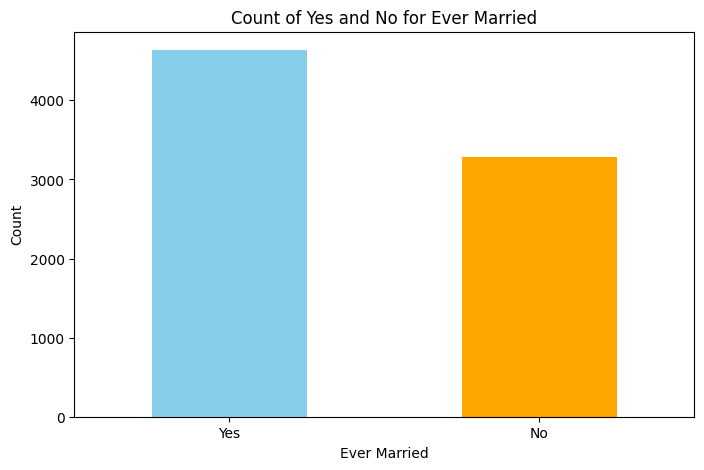

In [108]:
# Count of Yes and No for Ever_Married
ever_married_counts = train_data['Ever_Married'].value_counts()

# Plotting
plt.figure(figsize=(8, 5))
ever_married_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Count of Yes and No for Ever Married')
plt.ylabel('Count')
plt.xlabel('Ever Married')
plt.xticks(rotation=0)
plt.show()


In [109]:
print(train_data.groupby('Spending_Score')['Ever_Married'].value_counts())

Spending_Score  Ever_Married
Average         Yes             1934
High            Yes             1175
Low             No              3280
                Yes             1526
Name: count, dtype: int64


In [110]:
print(train_data.groupby('Profession')['Ever_Married'].value_counts())

Profession     Ever_Married
Artist         Yes             1774
               No               713
Doctor         No               366
               Yes              311
Engineer       Yes              415
               No               267
Entertainment  Yes              579
               No               358
Executive      Yes              550
               No                37
Healthcare     No              1152
               Yes              145
Homemaker      Yes              128
               No               112
Lawyer         Yes              572
               No                40
Marketing      No               189
               Yes               95
Name: count, dtype: int64


<Axes: xlabel='Ever_Married', ylabel='count'>

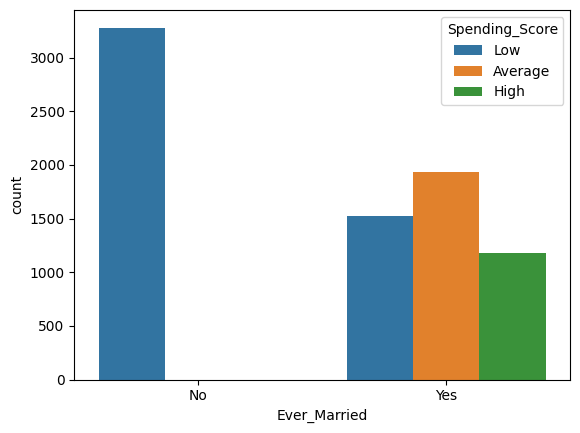

In [111]:
import seaborn as sns
sns.countplot(data=train_data, x='Ever_Married', hue='Spending_Score')

<Axes: xlabel='Ever_Married', ylabel='count'>

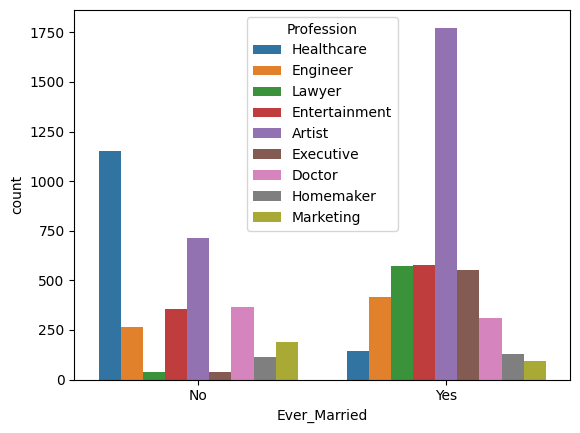

In [112]:
sns.countplot(data=train_data, x='Ever_Married', hue='Profession')

In [113]:
train_data.loc[ (pd.isnull(train_data["Ever_Married"])) & ((train_data['Spending_Score'] == 'Average') | (train_data['Spending_Score'] == 'High')),"Ever_Married"] = 'Yes'
train_data.loc[ (pd.isnull(train_data["Ever_Married"])) & (train_data['Spending_Score'] == 'Low'),"Ever_Married"] = 'No'
train_data.loc[ (pd.isnull(train_data["Ever_Married"])) & (train_data['Profession'] == 'Healthcare'),"Ever_Married"] = 'No'
train_data.loc[ (pd.isnull(train_data["Ever_Married"])) & (train_data['Profession'] == 'Artist'),"Ever_Married"] = 'Yes'
train_data.loc[ (pd.isnull(train_data["Ever_Married"])) & (train_data['Age'] > 40),"Ever_Married"] = 'Yes'

In [114]:
test_data.loc[ (pd.isnull(test_data["Ever_Married"])) & ((test_data['Spending_Score'] == 'Average') | (test_data['Spending_Score'] == 'High')),"Ever_Married"] = 'Yes'
test_data.loc[ (pd.isnull(test_data["Ever_Married"])) & (test_data['Spending_Score'] == 'Low'),"Ever_Married"] = 'No'
test_data.loc[ (pd.isnull(test_data["Ever_Married"])) & (test_data['Profession'] == 'Healthcare'),"Ever_Married"] = 'No'
test_data.loc[ (pd.isnull(test_data["Ever_Married"])) & (test_data['Profession'] == 'Artist'),"Ever_Married"] = 'Yes'
test_data.loc[ (pd.isnull(test_data["Ever_Married"])) & (test_data['Age'] > 40),"Ever_Married"] = 'Yes'

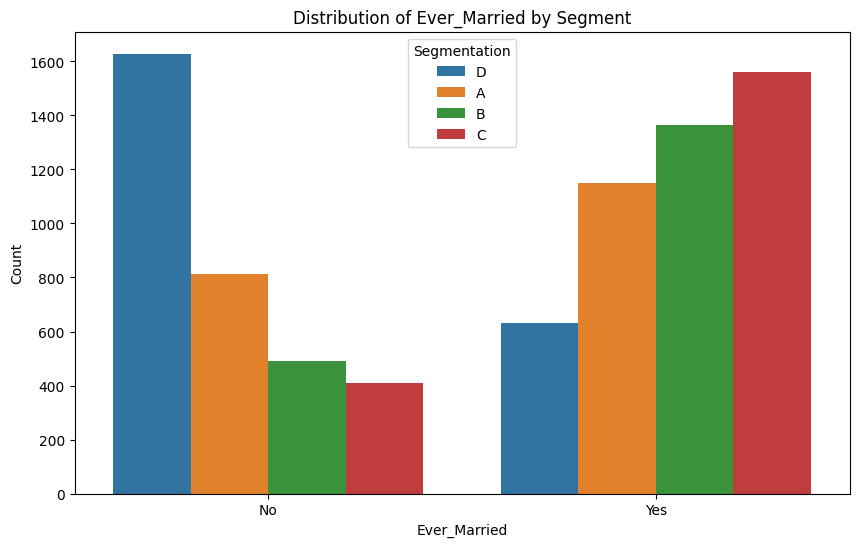

In [115]:
# 7. Categorical Feature Analysis
categorical_cols = ['Ever_Married']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Segmentation', data=train_data)
    plt.title(f"Distribution of {col} by Segment")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Var_1

In [116]:
print('The count of each category\n',train_data.Var_1.value_counts())

The count of each category
 Var_1
Cat_6    5232
Cat_4    1084
Cat_3     820
Cat_2     422
Cat_7     201
Cat_1     133
Cat_5      85
Name: count, dtype: int64


In [117]:
train_data.Var_1.isnull().sum()

72

In [118]:
test_data.Var_1.isnull().sum()

32

In [119]:
print(train_data.groupby('Graduated')['Var_1'].value_counts())

Graduated  Var_1
No         Cat_6    1628
           Cat_4     668
           Cat_3     349
           Cat_2     151
           Cat_7      84
           Cat_1      58
           Cat_5      41
Yes        Cat_6    3574
           Cat_3     454
           Cat_4     398
           Cat_2     266
           Cat_7     117
           Cat_1      74
           Cat_5      43
Name: count, dtype: int64


<Axes: xlabel='Var_1', ylabel='count'>

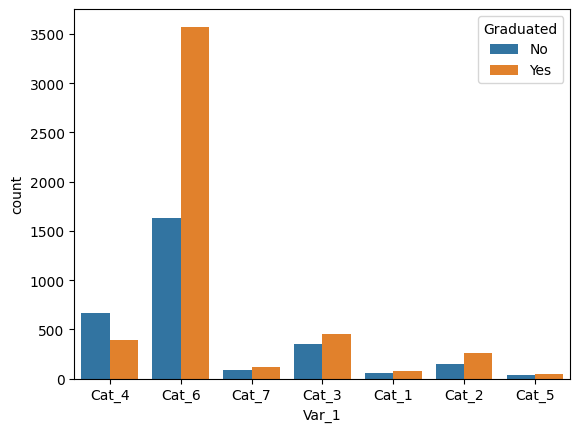

In [120]:
import seaborn as sns
sns.countplot(data=train_data, x='Var_1', hue='Graduated')

In [121]:
print(train_data.groupby('Profession')['Var_1'].value_counts())

Profession  Var_1
Artist      Cat_6    1844
            Cat_3     205
            Cat_4     199
            Cat_2     121
            Cat_7      63
                     ... 
Marketing   Cat_4      48
            Cat_7      11
            Cat_2      10
            Cat_1       8
            Cat_5       5
Name: count, Length: 63, dtype: int64


<Axes: xlabel='Var_1', ylabel='count'>

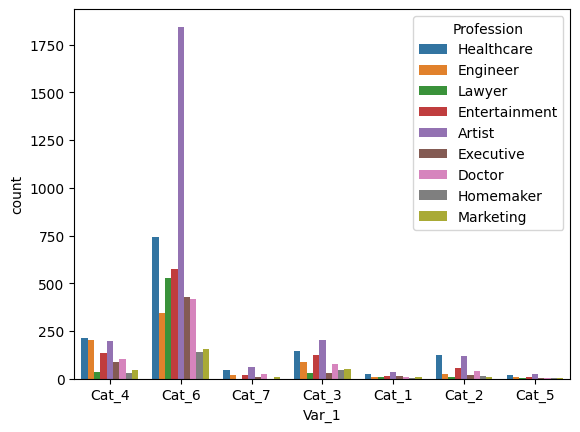

In [122]:

sns.countplot(data=train_data, x='Var_1', hue='Profession')

<Axes: xlabel='Var_1', ylabel='Age'>

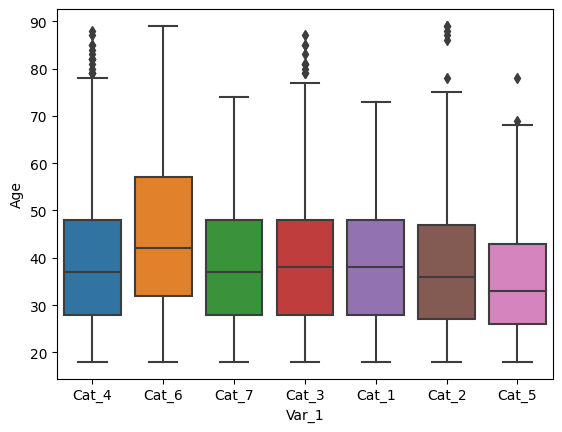

In [123]:
sns.boxplot(data=train_data, x='Var_1', y='Age')

In [124]:
train_data.loc[ (pd.isnull(train_data['Var_1'])) & (train_data['Graduated'] == 'Yes'),"Var_1"] = 'Cat_6'
train_data.loc[ (pd.isnull(train_data["Var_1"])) & ((train_data['Profession'] == 'Lawyer') | (train_data['Profession'] == 'Artist') | (train_data['Profession'] == 'Entertainment')),"Var_1"] = 'Cat_6'
train_data.loc[ (pd.isnull(train_data["Var_1"])) & (train_data['Age'] > 45),"Var_1"] = 'Cat_6'

In [125]:
test_data.loc[ (pd.isnull(test_data['Var_1'])) & (test_data['Graduated'] == 'Yes'),"Var_1"] = 'Cat_6'
test_data.loc[ (pd.isnull(test_data["Var_1"])) & ((test_data['Profession'] == 'Lawyer') | (test_data['Profession'] == 'Artist') | (test_data['Profession'] == 'Entertainment')),"Var_1"] = 'Cat_6'
test_data.loc[ (pd.isnull(test_data["Var_1"])) & (test_data['Age'] > 45),"Var_1"] = 'Cat_6'

In [126]:
# Find the mode of the 'Graduate' column
graduate_mode = train_data['Var_1'].mode()[0]

# Fill missing values with the mode
train_data['Var_1'] = train_data['Var_1'].fillna(graduate_mode)


In [127]:
# Find the mode of the 'Graduate' column
graduate_mode = test_data['Var_1'].mode()[0]

# Fill missing values with the mode
test_data['Var_1'] = test_data['Var_1'].fillna(graduate_mode)

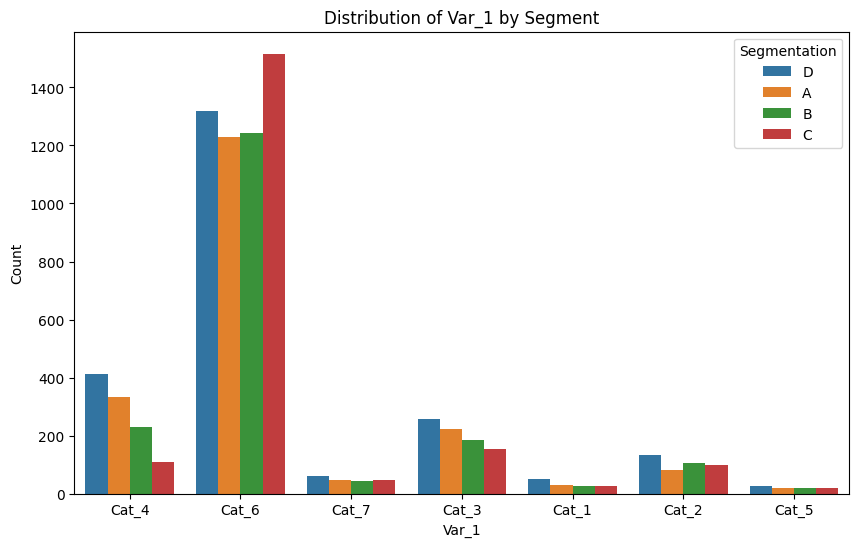

In [128]:
# 7. Categorical Feature Analysis
categorical_cols = ['Var_1']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Segmentation', data=train_data)
    plt.title(f"Distribution of {col} by Segment")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Graduate

In [129]:
print('Count of each graduate and non-graduate\n',train_data.Graduated.value_counts())

Count of each graduate and non-graduate
 Graduated
Yes    4965
No     3012
Name: count, dtype: int64


In [130]:
train_data.Graduated.isnull().sum()

72

In [131]:
test_data.Graduated.isnull().sum()

24

In [132]:
print(train_data.groupby('Spending_Score')['Graduated'].value_counts())

Spending_Score  Graduated
Average         Yes          1449
                No            502
High            Yes           779
                No            422
Low             Yes          2737
                No           2088
Name: count, dtype: int64


In [133]:
train_data.loc[ (pd.isnull(train_data["Graduated"])) & (train_data['Spending_Score'] == 'Average'),"Graduated"] = 'Yes'

In [134]:
test_data.loc[ (pd.isnull(test_data["Graduated"])) & (test_data['Spending_Score'] == 'Average'),"Graduated"] = 'Yes'

In [135]:
print(train_data.groupby('Ever_Married')['Graduated'].value_counts())

Ever_Married  Graduated
No            Yes          1690
              No           1623
Yes           Yes          3294
              No           1389
Name: count, dtype: int64


In [136]:
train_data.loc[ (pd.isnull(train_data["Graduated"])) & (train_data['Ever_Married'] == 'Yes'),"Graduated"] = 'Yes'

In [137]:
test_data.loc[ (pd.isnull(test_data["Graduated"])) & (test_data['Ever_Married'] == 'Yes'),"Graduated"] = 'Yes'

In [138]:
print(train_data.groupby('Var_1')['Graduated'].value_counts())

Var_1  Graduated
Cat_1  Yes            75
       No             58
Cat_2  Yes           268
       No            151
Cat_3  Yes           464
       No            349
Cat_4  No            668
       Yes           409
Cat_5  Yes            43
       No             41
Cat_6  Yes          3631
       No           1661
Cat_7  Yes           117
       No             84
Name: count, dtype: int64


In [139]:
train_data.loc[ (pd.isnull(train_data["Graduated"])) & (train_data['Var_1'] == 'Cat_4'),"Graduated"] = 'No'

In [140]:
test_data.loc[ (pd.isnull(test_data["Graduated"])) & (test_data['Var_1'] == 'Cat_4'),"Graduated"] = 'No'

In [141]:
print(train_data.groupby('Profession')['Graduated'].value_counts())

Profession     Graduated
Artist         Yes          2217
               No            294
Doctor         Yes           398
               No            288
Engineer       No            385
               Yes           313
Entertainment  Yes           599
               No            345
Executive      Yes           304
               No            294
Healthcare     No            845
               Yes           477
Homemaker      Yes           140
               No            106
Lawyer         Yes           389
               No            230
Marketing      No            174
               Yes           116
Name: count, dtype: int64


In [142]:
train_data.loc[ (pd.isnull(train_data["Graduated"])) & (train_data['Profession'] == 'Artist'),"Graduated"] = 'Yes'

In [143]:
test_data.loc[ (pd.isnull(test_data["Graduated"])) & (test_data['Profession'] == 'Artist'),"Graduated"] = 'Yes'

In [144]:
# # Find the mode of the 'Graduate' column
# graduate_mode = train_data['Graduated'].mode()[0]

# # Fill missing values with the mode
# train_data['Graduated'] = train_data['Graduated'].fillna(graduate_mode)

train_data['Graduated'] = train_data['Graduated'].fillna(method='pad')

test_data['Graduated'] = test_data['Graduated'].fillna(method='pad')

/tmp/ipykernel_24/2290857572.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_data['Graduated'] = train_data['Graduated'].fillna(method='pad')
/tmp/ipykernel_24/2290857572.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_data['Graduated'] = test_data['Graduated'].fillna(method='pad')


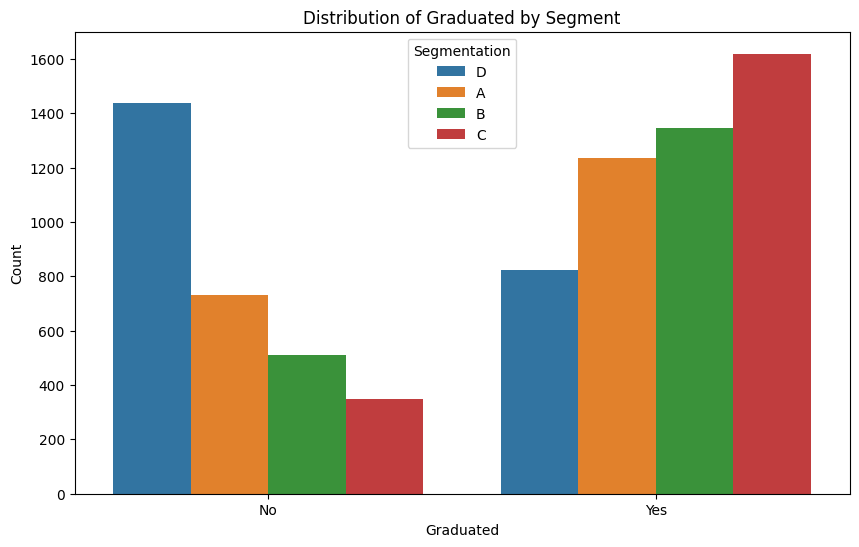

In [145]:
# 7. Categorical Feature Analysis
categorical_cols = ['Graduated']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Segmentation', data=train_data)
    plt.title(f"Distribution of {col} by Segment")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

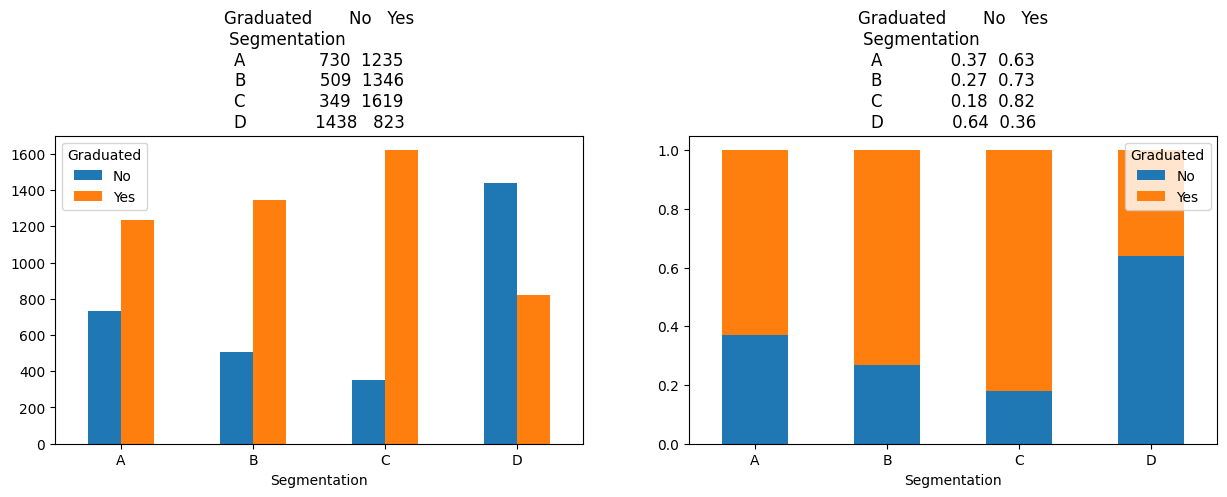

In [146]:
# Counting graduate and non-graduate in each segment
ax1 = train_data.groupby(["Segmentation"])["Graduated"].value_counts().unstack().round(3)

ax2 = train_data.pivot_table(columns='Graduated',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

# Profession

In [147]:
print('Count of each profession\n',train_data.Profession.value_counts())

Count of each profession
 Profession
Artist           2515
Healthcare       1331
Entertainment     949
Engineer          699
Doctor            688
Lawyer            619
Executive         598
Marketing         291
Homemaker         246
Name: count, dtype: int64


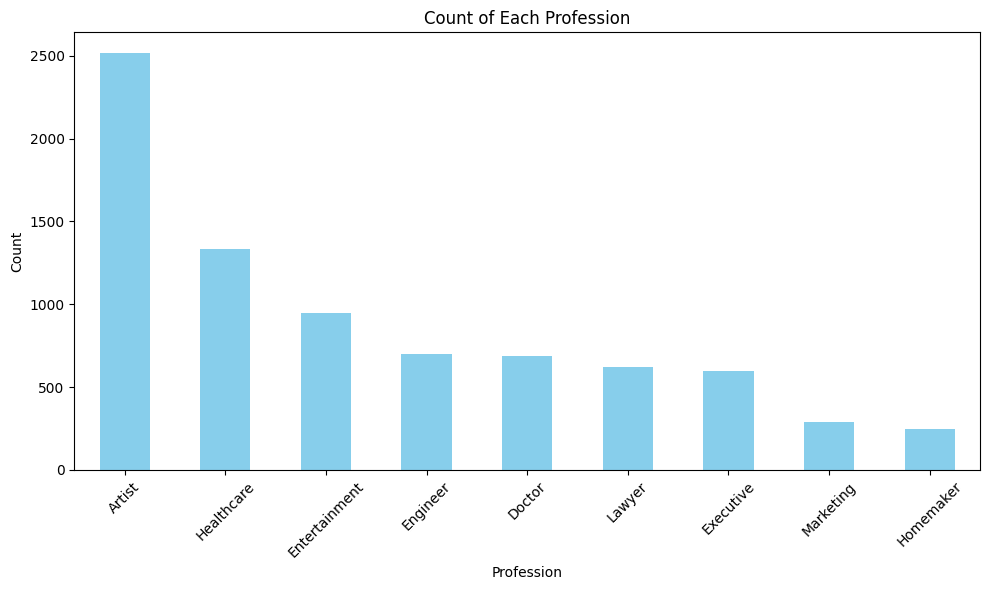

In [148]:
# Count of Each Profession
profession_counts = train_data['Profession'].value_counts()

# Plotting the Bar Graph
plt.figure(figsize=(10, 6))
profession_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Each Profession')
plt.ylabel('Count')
plt.xlabel('Profession')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [149]:
train_data.Profession.isnull().sum()

113

In [150]:
test_data.Profession.isnull().sum()

38

In [151]:
print(train_data.groupby('Ever_Married')['Profession'].value_counts())

Ever_Married  Profession   
No            Healthcare       1178
              Artist            725
              Doctor            371
              Entertainment     362
              Engineer          273
              Marketing         191
              Homemaker         117
              Lawyer             42
              Executive          38
Yes           Artist           1790
              Entertainment     587
              Lawyer            577
              Executive         560
              Engineer          426
              Doctor            317
              Healthcare        153
              Homemaker         129
              Marketing         100
Name: count, dtype: int64


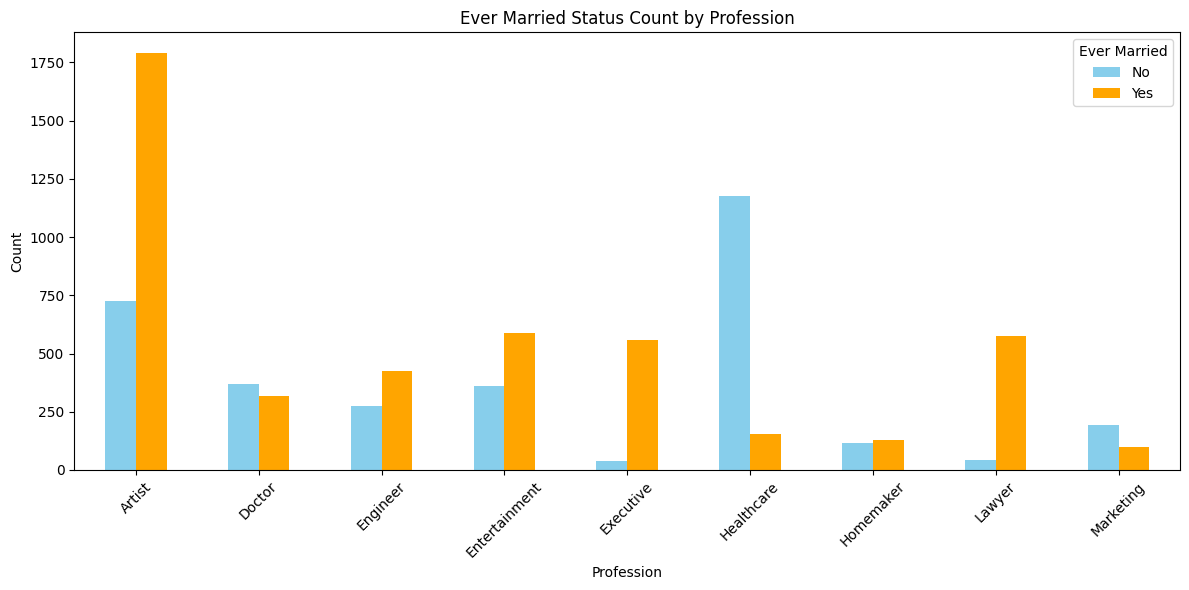

In [152]:
# Grouping by Ever_Married and Profession
grouped_data = train_data.groupby('Profession')['Ever_Married'].value_counts().unstack()

grouped_data.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'orange'])
plt.title('Ever Married Status Count by Profession')
plt.ylabel('Count')
plt.xlabel('Profession')
plt.xticks(rotation=45)
plt.legend(title='Ever Married', loc='upper right')
plt.tight_layout()
plt.show()


In [153]:
train_data.loc[ (pd.isnull(train_data["Profession"])) & (train_data['Ever_Married'] == 'Yes'),"Profession"] = 'Artist'
train_data.loc[ (pd.isnull(train_data["Profession"])) & (train_data['Ever_Married'] == 'No'),"Profession"] = 'Healthcare'

In [154]:
test_data.loc[ (pd.isnull(test_data["Profession"])) & (test_data['Ever_Married'] == 'Yes'),"Profession"] = 'Artist'
test_data.loc[ (pd.isnull(test_data["Profession"])) & (test_data['Ever_Married'] == 'No'),"Profession"] = 'Healthcare'

In [155]:
print(train_data.groupby('Spending_Score')['Profession'].value_counts())

Spending_Score  Profession   
Average         Artist           1041
                Entertainment     319
                Engineer          221
                Doctor            177
                Executive          75
                Homemaker          60
                Healthcare         42
                Lawyer             18
                Marketing          17
High            Executive         397
                Lawyer            322
                Artist            250
                Engineer           60
                Entertainment      46
                Healthcare         45
                Marketing          33
                Doctor             31
                Homemaker          26
Low             Artist           1291
                Healthcare       1290
                Entertainment     584
                Doctor            480
                Engineer          418
                Lawyer            279
                Marketing         241
                Home

In [156]:
train_data.loc[ (pd.isnull(train_data["Profession"])) & (train_data['Spending_Score'] == 'Average'),"Profession"] = 'Artist'
train_data.loc[ (pd.isnull(train_data["Profession"])) & (train_data['Spending_Score'] == 'High'),"Profession"] = 'Executives'

In [157]:
test_data.loc[ (pd.isnull(test_data["Profession"])) & (test_data['Spending_Score'] == 'Average'),"Profession"] = 'Artist'
test_data.loc[ (pd.isnull(test_data["Profession"])) & (test_data['Spending_Score'] == 'High'),"Profession"] = 'Executives'

In [158]:
print(train_data.groupby('Graduated')['Profession'].value_counts())

Graduated  Profession   
No         Healthcare        880
           Engineer          385
           Entertainment     347
           Artist            321
           Executive         294
           Doctor            288
           Lawyer            230
           Marketing         175
           Homemaker         106
Yes        Artist           2261
           Entertainment     602
           Healthcare        497
           Doctor            400
           Lawyer            389
           Engineer          314
           Executive         304
           Homemaker         140
           Marketing         116
Name: count, dtype: int64


In [159]:
train_data.loc[ (pd.isnull(train_data["Profession"])) & (train_data['Graduated'] == 'Yes'),"Profession"] = 'Artist'

In [160]:
test_data.loc[ (pd.isnull(test_data["Profession"])) & (test_data['Graduated'] == 'Yes'),"Profession"] = 'Artist'

In [161]:
# Filter data for family size < 3
filtered_data = train_data[train_data['Family_Size'] < 3]

profession_counts = filtered_data.groupby('Profession').size()

highest_profession = profession_counts.sort_values(ascending=False)

print("Profession counts for family size < 3:\n")
print(highest_profession)

# Get the profession with the highest count
top_profession = highest_profession.idxmax()
top_count = highest_profession.max()

print(f"\nThe profession with the highest count for Family_Size < 3 is '{top_profession}' with {top_count} occurrences.")


Profession counts for family size < 3:

Profession
Artist           1509
Lawyer            509
Entertainment     469
Doctor            319
Engineer          314
Healthcare        281
Executive         178
Homemaker         146
Marketing         116
dtype: int64

The profession with the highest count for Family_Size < 3 is 'Artist' with 1509 occurrences.


In [162]:
train_data.loc[ (pd.isnull(train_data["Profession"])) & (train_data['Family_Size'] < 3),"Profession"] = 'Artist'

In [163]:
test_data.loc[ (pd.isnull(test_data["Profession"])) & (test_data['Family_Size'] < 3),"Profession"] = 'Artist'

<Axes: xlabel='Profession', ylabel='count'>

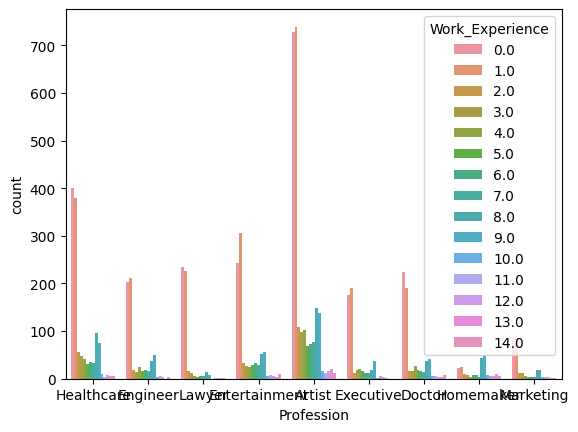

In [164]:
import seaborn as sns
sns.countplot(data=train_data, x='Profession', hue='Work_Experience')

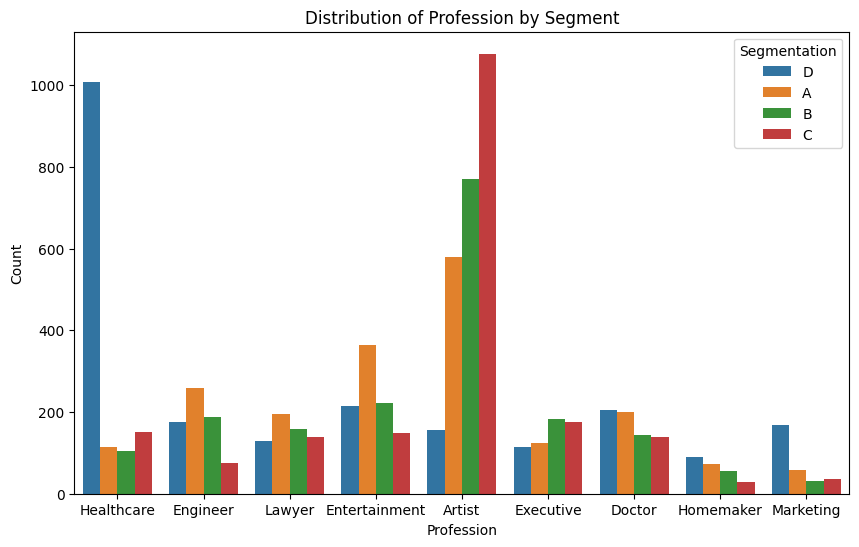

In [165]:
# 7. Categorical Feature Analysis
categorical_cols = ['Profession']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Segmentation', data=train_data)
    plt.title(f"Distribution of {col} by Segment")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Correlation
The correlation matrix displays the linear relationship between numerical features in your dataset. Each value in the matrix represents the correlation coefficient between two features, ranging from -1 to 1:

1. 1: Perfect positive correlation (as one increases, the other increases).
2. -1: Perfect negative correlation (as one increases, the other decreases).
3. 0: No linear correlation.


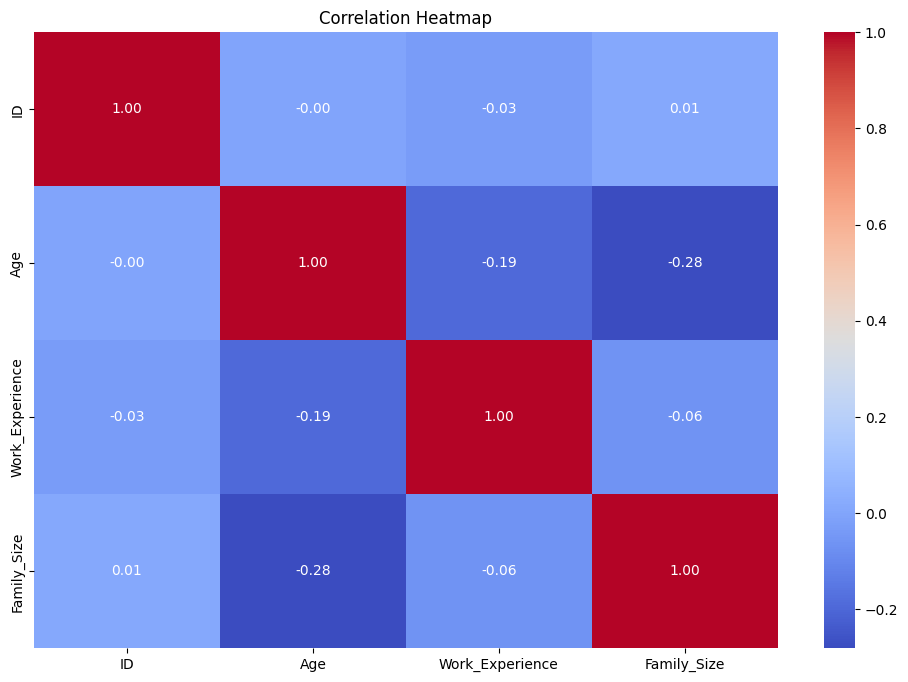

In [166]:
numerical_cols = train_data.select_dtypes(include=["float64", "int64"]).columns
correlation_matrix = train_data[numerical_cols].corr()
# Heatmap for Correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

**Conclusion**
1. None of the numerical features are highly correlated with each other which means:
   1. There’s no multicollinearity issue (you don't need to drop features to avoid redundancy).
   1. Features appear to provide independent information, which is good for modeling.
2. The ID column has no meaningful correlation with any other feature (~0 values).This is expected because ID is likely just a unique identifier and should be excluded from model training.

In [167]:
print("\nBasic statistics for numerical columns:")
print(train_data.describe())


Basic statistics for numerical columns:
                  ID          Age  Work_Experience  Family_Size
count    8049.000000  8049.000000      7236.000000  7729.000000
mean   463481.549012    43.458442         2.642758     2.850175
std      2595.221174    16.704328         3.407044     1.531523
min    458982.000000    18.000000         0.000000     1.000000
25%    461244.000000    30.000000         0.000000     2.000000
50%    463476.000000    40.000000         1.000000     3.000000
75%    465746.000000    53.000000         4.000000     4.000000
max    467974.000000    89.000000        14.000000     9.000000


1. Work_Experience and Family_Size have fewer entries, indicating missing values.
2. Age: Ranges from 18 to 89, with an average of ~43.
3. Work_Experience: Ranges from 0 to 14 years, average of ~2.6.
4. Family_Size: Ranges from 1 to 9, average of ~2.85. The high maximum value (9) might  indicate potential outliers.

In [168]:
print("\nBasic statistics for numerical columns:")
print(test_data.describe())


Basic statistics for numerical columns:
                  ID          Age  Work_Experience  Family_Size  Segmentation
count    2627.000000  2627.000000      2358.000000  2514.000000           0.0
mean   463433.918919    43.649791         2.552587     2.825378           NaN
std      2618.245698    16.967015         3.341094     1.551906           NaN
min    458989.000000    18.000000         0.000000     1.000000           NaN
25%    461162.500000    30.000000         0.000000     2.000000           NaN
50%    463379.000000    41.000000         1.000000     2.000000           NaN
75%    465696.000000    53.000000         4.000000     4.000000           NaN
max    467968.000000    89.000000        14.000000     9.000000           NaN


# Age

In [169]:
train_data.Age.describe(percentiles=[0.25,0.5,0.75,0.99])

count    8049.000000
mean       43.458442
std        16.704328
min        18.000000
25%        30.000000
50%        40.000000
75%        53.000000
99%        87.000000
max        89.000000
Name: Age, dtype: float64

In [170]:
train_data.Age.isnull().sum()

0

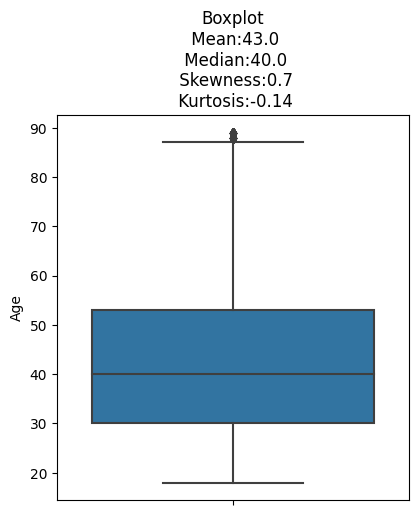

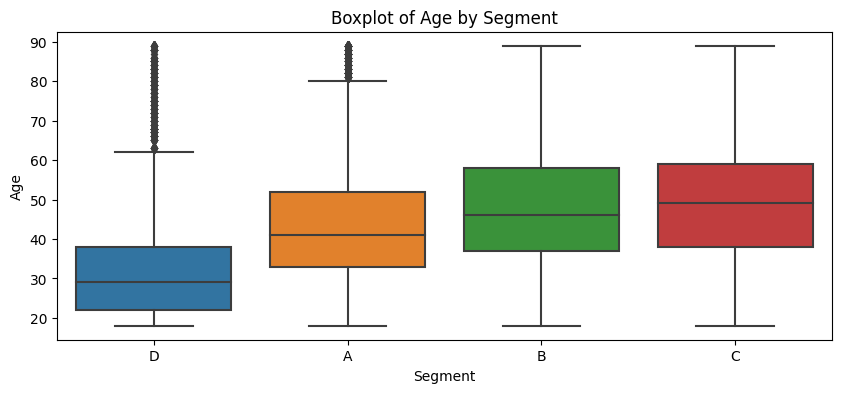

In [171]:
# Looking the distribution of column Age
plt.figure(figsize=(10,5))

skewness = round(train_data.Age.skew(),2)
kurtosis = round(train_data.Age.kurtosis(),2)
mean = round(np.mean(train_data.Age),0)
median = np.median(train_data.Age)

plt.subplot(1,2,1)
sns.boxplot(y=train_data.Age)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))


# Corrected code to visualize potential outliers
import matplotlib.pyplot as plt
import seaborn as sns

# List of relevant numerical columns
numerical_cols = ["Age"]

# Plot boxplots for each numerical column by segmentation
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x='Segmentation', y=col, data=train_data)
    plt.title(f"Boxplot of {col} by Segment")
    plt.xlabel("Segment")
    plt.ylabel(col)
    plt.show()


In [172]:
train_data['Age'] = train_data['Age'].astype(int)
train_data.Age.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    8049.000000
mean       43.458442
std        16.704328
min        18.000000
25%        30.000000
50%        40.000000
75%        53.000000
90%        69.000000
95%        77.000000
99%        87.000000
max        89.000000
Name: Age, dtype: float64

In [173]:
test_data['Age'] = test_data['Age'].astype(int)
test_data.Age.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    2627.000000
mean       43.649791
std        16.967015
min        18.000000
25%        30.000000
50%        41.000000
75%        53.000000
90%        69.000000
95%        78.000000
99%        87.000000
max        89.000000
Name: Age, dtype: float64

/tmp/ipykernel_24/958505871.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ax2 = train_data.pivot_table(columns='Age_Bin',index='Segmentation',values='ID',aggfunc='count')


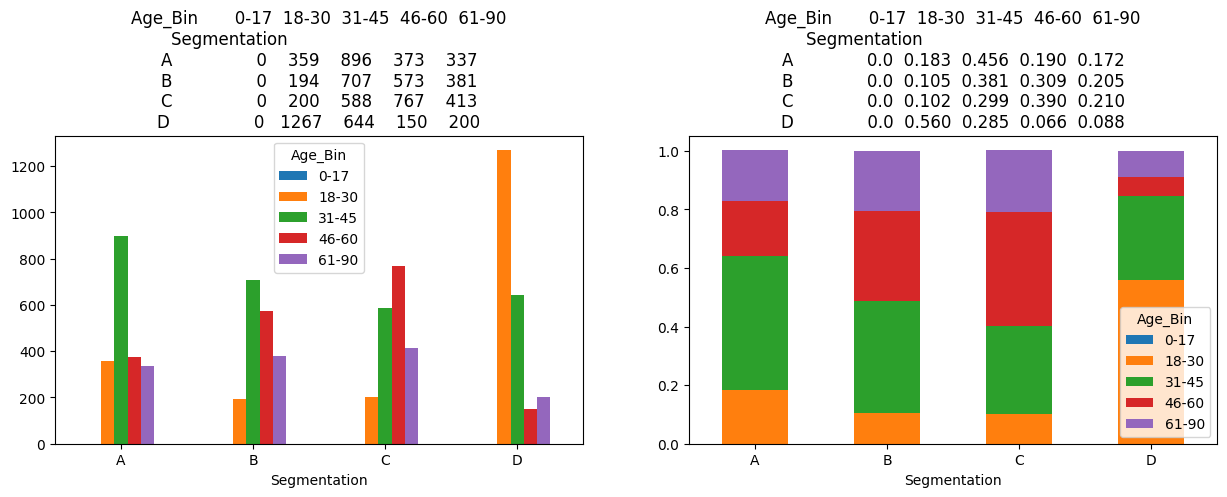

In [174]:
train_data['Age_Bin'] = pd.cut(train_data.Age,bins=[0, 17, 30, 45, 60, 90],labels=['0-17', '18-30', '31-45', '46-60', '61-90'])
ax1 = train_data.groupby(["Segmentation"])["Age_Bin"].value_counts().unstack().round(3)

# Percentage of age bins in each segment
ax2 = train_data.pivot_table(columns='Age_Bin',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(3)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

In [175]:
test_data['Age_Bin'] = pd.cut(test_data.Age,bins=[0, 17, 30, 45, 60, 90],labels=['0-17', '18-30', '31-45', '46-60', '61-90'])

# Work Experience


In [177]:
train_data.Work_Experience.describe(percentiles=[0.25,0.5,0.75,0.99])

count    7236.000000
mean        2.642758
std         3.407044
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
99%        13.000000
max        14.000000
Name: Work_Experience, dtype: float64

In [178]:
train_data.Work_Experience.isnull().sum()

813

In [179]:
test_data.Work_Experience.isnull().sum()

269

In [180]:
train_data['Work_Experience'] = train_data['Work_Experience'].fillna(train_data['Work_Experience'].mean())

In [181]:
test_data['Work_Experience'] = test_data['Work_Experience'].fillna(test_data['Work_Experience'].mean())

/tmp/ipykernel_24/4154602792.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(a,shade= False, label = 'A')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_24/4154602792.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(b,shade= False, label = 'B')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/t

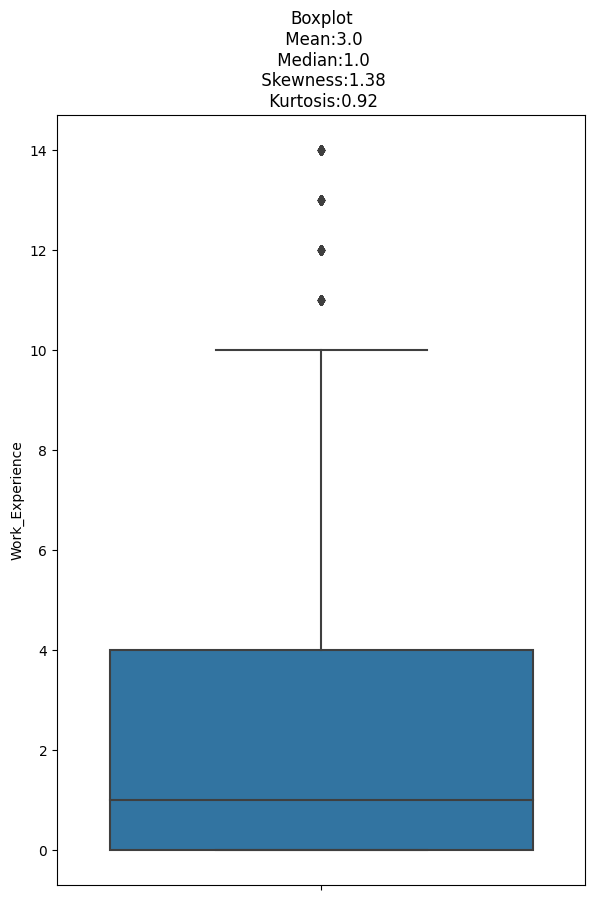

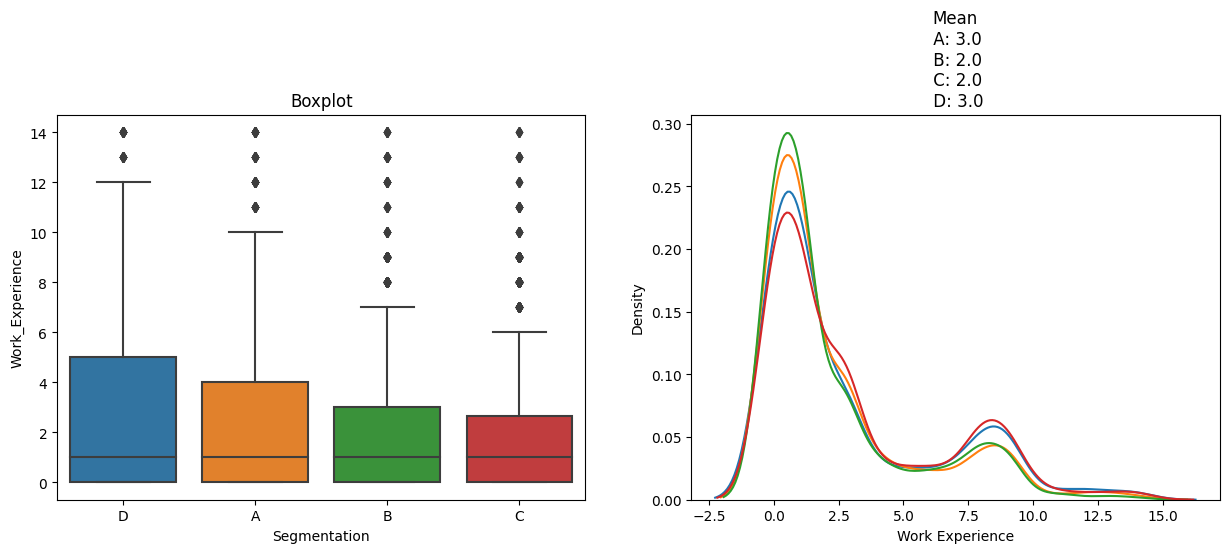

In [182]:
plt.figure(figsize=(15,10))

skewness = round(train_data.Work_Experience.skew(),2)
kurtosis = round(train_data.Work_Experience.kurtosis(),2)
mean = round(np.mean(train_data.Work_Experience),0)
median = np.median(train_data.Work_Experience)

plt.subplot(1,2,1)
sns.boxplot(y=train_data.Work_Experience)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

a = train_data[train_data.Segmentation =='A']["Work_Experience"]
b = train_data[train_data.Segmentation =='B']["Work_Experience"]
c = train_data[train_data.Segmentation =='C']["Work_Experience"]
d = train_data[train_data.Segmentation =='D']["Work_Experience"]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data = train_data, x = "Segmentation", y="Work_Experience")
plt.title('Boxplot')

plt.subplot(1,2,2)
sns.kdeplot(a,shade= False, label = 'A')
sns.kdeplot(b,shade= False, label = 'B')
sns.kdeplot(c,shade= False, label = 'C')
sns.kdeplot(d,shade= False, label = 'D')
plt.xlabel('Work Experience')
plt.ylabel('Density')
plt.title("Mean\n A: {}\n B: {}\n C: {}\n D: {}".format(round(a.mean(),0),round(b.mean(),0),round(c.mean(),0),round(d.mean(),0)))

plt.show()

/tmp/ipykernel_24/1346904001.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ax2 = train_data.pivot_table(columns='Work_Exp_Category',index='Segmentation',values='ID',aggfunc='count')


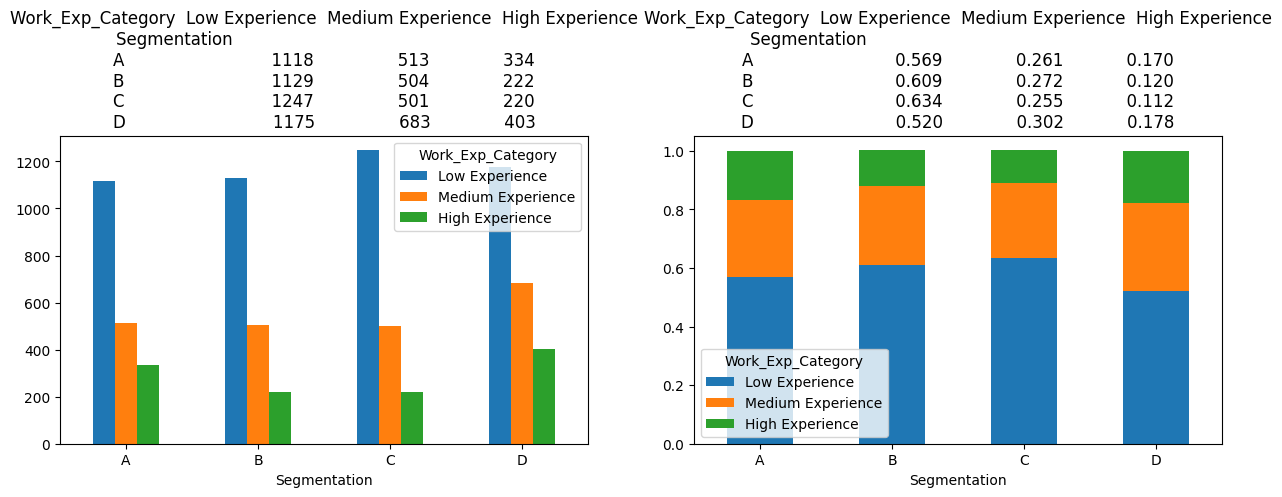

In [183]:
train_data['Work_Experience'] = train_data['Work_Experience'].astype(int)
train_data.Work_Experience.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])
train_data['Work_Exp_Category'] = pd.cut(train_data.Work_Experience,bins=[-1,1,7,15],labels=['Low Experience','Medium Experience','High Experience'])
ax1 = train_data.groupby(["Segmentation"])["Work_Exp_Category"].value_counts().unstack().round(3)

# Percentage of work experience in each segment
ax2 = train_data.pivot_table(columns='Work_Exp_Category',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(3)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

In [184]:
test_data['Work_Experience'] = test_data['Work_Experience'].astype(int)
test_data.Work_Experience.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])
test_data['Work_Exp_Category'] = pd.cut(test_data.Work_Experience,bins=[-1,1,7,15],labels=['Low Experience','Medium Experience','High Experience'])

# Spending Score¶


In [185]:
print('Count of spending score\n',train_data.Spending_Score.value_counts())
train_data.Spending_Score.isnull().sum()

Count of spending score
 Spending_Score
Low        4869
Average    1970
High       1210
Name: count, dtype: int64


0

Text(0.5, 1.0, 'Spending_Score  Average  High   Low\nSegmentation                       \nA                   343   268  1354\nB                   588   383   884\nC                   903   405   660\nD                   136   154  1971')

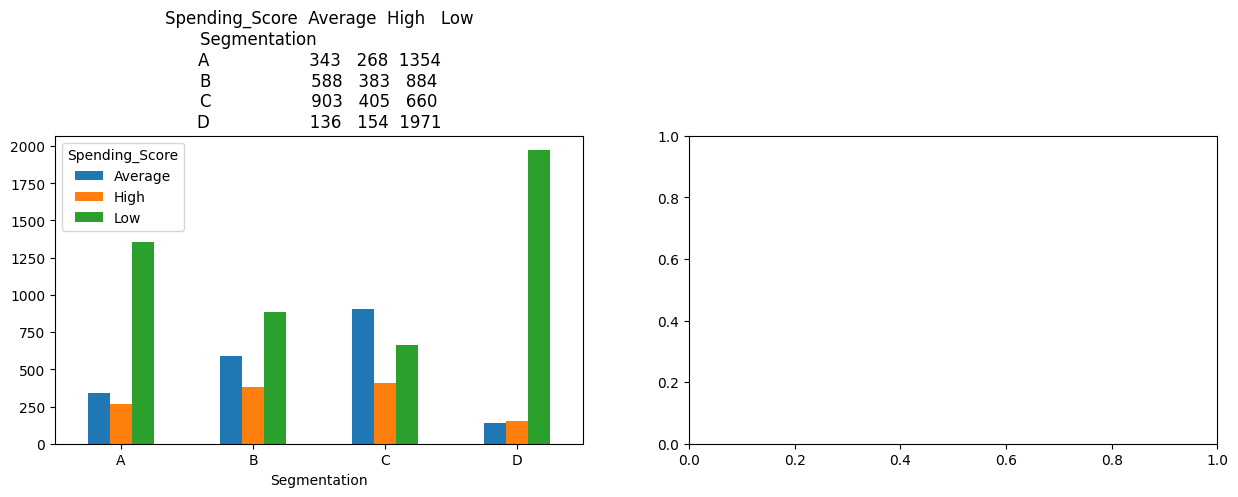

In [186]:
ax1 = train_data.groupby(["Segmentation"])["Spending_Score"].value_counts().unstack().round(3)

ax2 = train_data.pivot_table(columns='Spending_Score',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(3)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

# Family Size


In [187]:
train_data.Family_Size.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])


count    7729.000000
mean        2.850175
std         1.531523
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
90%         5.000000
95%         6.000000
99%         8.000000
max         9.000000
Name: Family_Size, dtype: float64

In [188]:
train_data.Family_Size.isnull().sum()

320

In [189]:
test_data.Family_Size.isnull().sum()


113

In [190]:
print(train_data.groupby('Ever_Married')['Family_Size'].value_counts())

Ever_Married  Family_Size
No            1.0             873
              3.0             643
              4.0             619
              2.0             464
              5.0             318
              6.0             123
              7.0              60
              8.0              37
              9.0              22
Yes           2.0            1925
              3.0             854
              4.0             758
              1.0             579
              5.0             294
              6.0              89
              7.0              36
              9.0              22
              8.0              13
Name: count, dtype: int64


In [191]:
train_data.loc[ (pd.isnull(train_data["Family_Size"])) & (train_data['Ever_Married'] == 'Yes'),"Family_Size"] = 2.0

In [192]:
test_data.loc[ (pd.isnull(test_data["Family_Size"])) & (test_data['Ever_Married'] == 'Yes'),"Family_Size"] = 2.0

In [193]:
print(train_data.groupby('Graduated')['Family_Size'].value_counts())

Graduated  Family_Size
No         2.0             696
           4.0             664
           3.0             619
           1.0             375
           5.0             331
           6.0             127
           7.0              58
           8.0              35
           9.0              27
Yes        2.0            1829
           1.0            1077
           3.0             878
           4.0             713
           5.0             281
           6.0              85
           7.0              38
           9.0              17
           8.0              15
Name: count, dtype: int64


In [194]:
train_data.loc[ (pd.isnull(train_data["Family_Size"])) & (train_data['Graduated'] == 'Yes'),"Family_Size"] = 2.0

In [195]:
test_data.loc[ (pd.isnull(test_data["Family_Size"])) & (test_data['Graduated'] == 'Yes'),"Family_Size"] = 2.0

In [196]:
# Filter data where Var_1 is "Cat6"
filtered_data = train_data[train_data['Var_1'] == 'Cat_6']
result = filtered_data.groupby('Var_1')['Family_Size'].value_counts()
print(result)

Var_1  Family_Size
Cat_6  2.0            1905
       1.0            1052
       3.0             997
       4.0             843
       5.0             310
       6.0              89
       7.0              30
       9.0              17
       8.0              13
Name: count, dtype: int64


In [197]:
train_data.loc[ (pd.isnull(train_data["Family_Size"])) & (train_data['Var_1'] == 'Cat_6'),"Family_Size"] = 2.0

In [198]:
test_data.loc[ (pd.isnull(test_data["Family_Size"])) & (test_data['Var_1'] == 'Cat_6'),"Family_Size"] = 2.0

In [199]:
# train_data['Family_Size'] = train_data['Family_Size'].fillna(int(train_data['Family_Size'].mean()))
# Fill remaining NaN with previous values
train_data['Family_Size'] = train_data['Family_Size'].fillna(method='pad')

/tmp/ipykernel_24/1247019918.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_data['Family_Size'] = train_data['Family_Size'].fillna(method='pad')


In [200]:
test_data['Family_Size'] = test_data['Family_Size'].fillna(method='pad')

/tmp/ipykernel_24/2680957484.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_data['Family_Size'] = test_data['Family_Size'].fillna(method='pad')


In [201]:
print(test_data['Family_Size'].isnull().sum())  # Should return 0

0


Text(0.5, 1.0, 'Boxplot\n Mean:3.0\n Median:2.0\n Skewness:1.07\n Kurtosis:1.42')

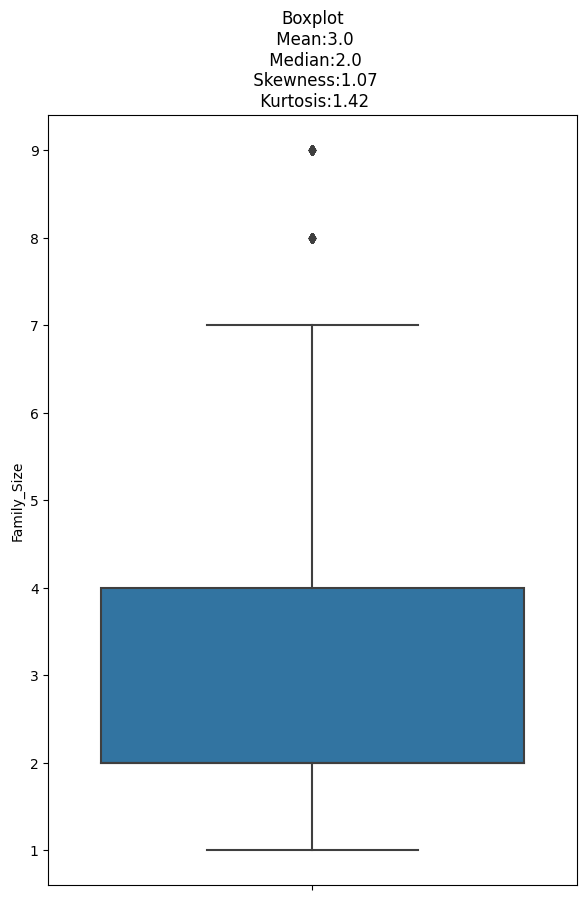

In [202]:
plt.figure(figsize=(15,10))

skewness = round(train_data.Family_Size.skew(),2)
kurtosis = round(train_data.Family_Size.kurtosis(),2)
mean = round(np.mean(train_data.Family_Size),0)
median = np.median(train_data.Family_Size)

plt.subplot(1,2,1)
sns.boxplot(y=train_data.Family_Size)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

/tmp/ipykernel_24/2218412109.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(a,shade= False, label = 'A')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_24/2218412109.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(b,shade= False, label = 'B')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/t

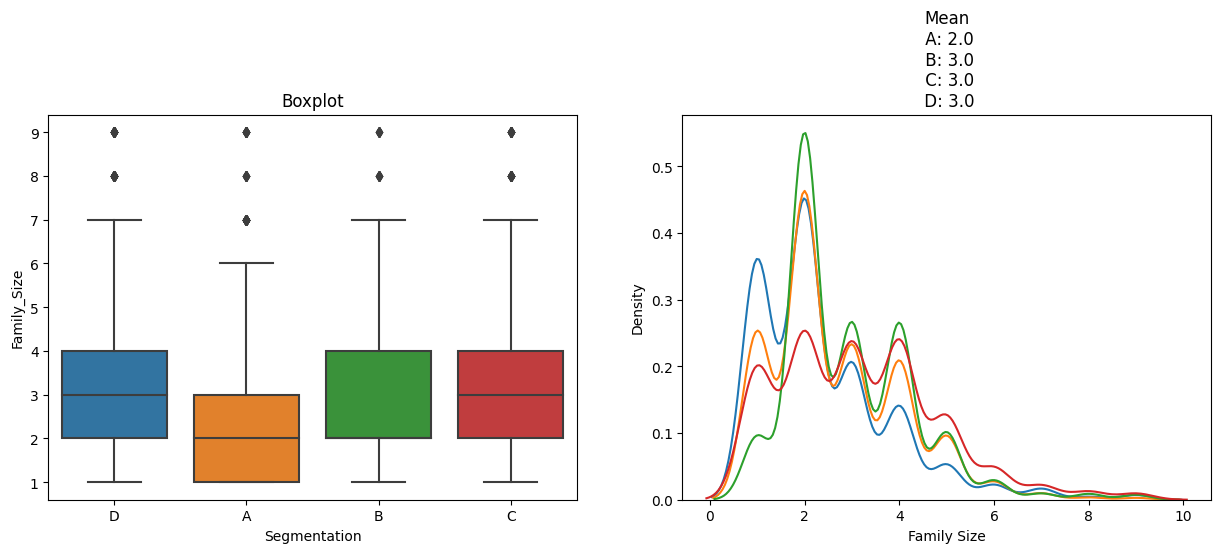

In [203]:
a = train_data[train_data.Segmentation =='A']["Family_Size"]
b = train_data[train_data.Segmentation =='B']["Family_Size"]
c = train_data[train_data.Segmentation =='C']["Family_Size"]
d = train_data[train_data.Segmentation =='D']["Family_Size"]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data = train_data, x = "Segmentation", y="Family_Size")
plt.title('Boxplot')

plt.subplot(1,2,2)
sns.kdeplot(a,shade= False, label = 'A')
sns.kdeplot(b,shade= False, label = 'B')
sns.kdeplot(c,shade= False, label = 'C')
sns.kdeplot(d,shade= False, label = 'D')
plt.xlabel('Family Size')
plt.ylabel('Density')
plt.title("Mean\n A: {}\n B: {}\n C: {}\n D: {}".format(round(a.mean(),0),round(b.mean(),0),round(c.mean(),0),round(d.mean(),0)))

plt.show()

In [204]:
train_data['Family_Size'] = train_data['Family_Size'].astype(int)
train_data.Family_Size.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])
train_data['Family_Size_Category'] = pd.cut(train_data.Family_Size,bins=[0,3,6,10],labels=['Small Family','Big Family','Joint Family'])

In [205]:
test_data['Family_Size'] = test_data['Family_Size'].astype(int)
test_data.Family_Size.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])
test_data['Family_Size_Category'] = pd.cut(test_data.Family_Size,bins=[0,3,6,10],labels=['Small Family','Big Family','Joint Family'])

/tmp/ipykernel_24/277191516.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ax2 = train_data.pivot_table(columns='Family_Size_Category',index='Segmentation',values='ID',aggfunc='count')


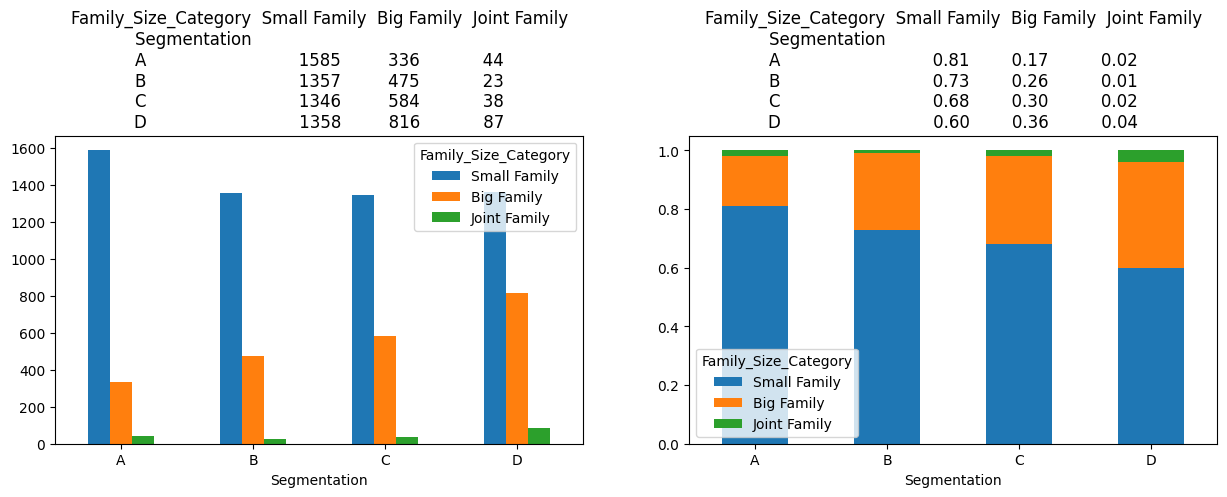

In [206]:
ax1 = train_data.groupby(["Segmentation"])["Family_Size_Category"].value_counts().unstack().round(3)

ax2 = train_data.pivot_table(columns='Family_Size_Category',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

In [207]:
train_data.isnull().sum()

ID                      0
Gender                  0
Ever_Married            0
Age                     0
Graduated               0
Profession              0
Work_Experience         0
Spending_Score          0
Family_Size             0
Var_1                   0
Segmentation            0
Age_Bin                 0
Work_Exp_Category       0
Family_Size_Category    0
dtype: int64

In [208]:
test_data.isnull().sum()

ID                         0
Gender                     0
Ever_Married               0
Age                        0
Graduated                  0
Profession                 0
Work_Experience            0
Spending_Score             0
Family_Size                0
Var_1                      0
Segmentation            2627
Age_Bin                    0
Work_Exp_Category          0
Family_Size_Category       0
dtype: int64

In [209]:
train_data.reset_index(drop=True, inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8049 entries, 0 to 8048
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    8049 non-null   int64   
 1   Gender                8049 non-null   object  
 2   Ever_Married          8049 non-null   object  
 3   Age                   8049 non-null   int64   
 4   Graduated             8049 non-null   object  
 5   Profession            8049 non-null   object  
 6   Work_Experience       8049 non-null   int64   
 7   Spending_Score        8049 non-null   object  
 8   Family_Size           8049 non-null   int64   
 9   Var_1                 8049 non-null   object  
 10  Segmentation          8049 non-null   object  
 11  Age_Bin               8049 non-null   category
 12  Work_Exp_Category     8049 non-null   category
 13  Family_Size_Category  8049 non-null   category
dtypes: category(3), int64(4), object(7)
memory usage: 715.9+

In [210]:
test_data.reset_index(drop=True, inplace=True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    2627 non-null   int64   
 1   Gender                2627 non-null   object  
 2   Ever_Married          2627 non-null   object  
 3   Age                   2627 non-null   int64   
 4   Graduated             2627 non-null   object  
 5   Profession            2627 non-null   object  
 6   Work_Experience       2627 non-null   int64   
 7   Spending_Score        2627 non-null   object  
 8   Family_Size           2627 non-null   int64   
 9   Var_1                 2627 non-null   object  
 10  Segmentation          0 non-null      float64 
 11  Age_Bin               2627 non-null   category
 12  Work_Exp_Category     2627 non-null   category
 13  Family_Size_Category  2627 non-null   category
dtypes: category(3), float64(1), int64(4), object(6)
memory u

In [211]:
train_data = train_data[['Gender', 'Ever_Married', 'Age', 'Age_Bin', 'Graduated', 'Profession', 'Work_Experience', 'Work_Exp_Category',
         'Spending_Score', 'Family_Size', 'Family_Size_Category','Var_1', 'Segmentation']]
train_data.head(10)

,Gender,Ever_Married,Age,Age_Bin,Graduated,Profession,Work_Experience,Work_Exp_Category,Spending_Score,Family_Size,Family_Size_Category,Var_1,Segmentation
0,Male,No,22,18-30,No,Healthcare,1,Low Experience,Low,4,Big Family,Cat_4,D
1,Female,Yes,38,31-45,Yes,Engineer,2,Medium Experience,Average,3,Small Family,Cat_4,A
2,Female,Yes,67,61-90,Yes,Engineer,1,Low Experience,Low,1,Small Family,Cat_6,B
3,Male,Yes,67,61-90,Yes,Lawyer,0,Low Experience,High,2,Small Family,Cat_6,B
4,Female,Yes,40,31-45,Yes,Entertainment,2,Medium Experience,High,6,Big Family,Cat_6,A
5,Male,Yes,56,46-60,No,Artist,0,Low Experience,Average,2,Small Family,Cat_6,C
6,Male,No,32,31-45,Yes,Healthcare,1,Low Experience,Low,3,Small Family,Cat_6,C
7,Female,No,33,31-45,Yes,Healthcare,1,Low Experience,Low,3,Small Family,Cat_6,D
8,Female,Yes,61,61-90,Yes,Engineer,0,Low Experience,Low,3,Small Family,Cat_7,D
9,Female,Yes,55,46-60,Yes,Artist,1,Low Experience,Average,4,Big Family,Cat_6,C


In [212]:
# Select relevant features (same as in training)
test_data = test_data[['Gender', 'Ever_Married', 'Age', 'Age_Bin', 'Graduated', 'Profession', 
                       'Work_Experience', 'Work_Exp_Category', 'Spending_Score', 
                       'Family_Size', 'Family_Size_Category', 'Var_1']]

In [213]:
# Step 3: Separate target and features
y = train_data['Segmentation']  # Target variable
X = train_data.drop(columns=['Segmentation'])  # Feature variables

In [216]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import pandas as pd

ordinal_cols = ['Age_Bin', 'Work_Exp_Category', 'Family_Size_Category']  # Columns with inherent order
nominal_cols = ['Gender', 'Profession', 'Var_1', 'Ever_Married', 'Graduated', 'Spending_Score']  # No inherent order

# Label Encoding for ordinal columns (keeps order intact)
label_enc = LabelEncoder()
for col in ordinal_cols:
    X[col] = label_enc.fit_transform(X[col])

# One-Hot Encoding for nominal columns without dropping any column
ohe = OneHotEncoder(sparse=False)
ohe_cols = ohe.fit_transform(X[nominal_cols])

# Convert encoded columns back to DataFrame
ohe_cols_df = pd.DataFrame(ohe_cols, columns=ohe.get_feature_names_out(nominal_cols), index=X.index)

# Drop original nominal columns and append all one-hot encoded columns
X = pd.concat([X.drop(columns=nominal_cols), ohe_cols_df], axis=1)

print("Final Features after Encoding:")
print(X.columns)



Final Features after Encoding:
Index(['Age', 'Age_Bin', 'Work_Experience', 'Work_Exp_Category', 'Family_Size',
       'Family_Size_Category', 'Gender_Female', 'Gender_Male',
       'Profession_Artist', 'Profession_Doctor', 'Profession_Engineer',
       'Profession_Entertainment', 'Profession_Executive',
       'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer',
       'Profession_Marketing', 'Var_1_Cat_1', 'Var_1_Cat_2', 'Var_1_Cat_3',
       'Var_1_Cat_4', 'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7',
       'Ever_Married_No', 'Ever_Married_Yes', 'Graduated_No', 'Graduated_Yes',
       'Spending_Score_Average', 'Spending_Score_High', 'Spending_Score_Low'],
      dtype='object')


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [217]:
for col in ordinal_cols:
    test_data[col] = label_enc.fit_transform(test_data[col])

# One-Hot Encoding for nominal columns without dropping any column
ohe = OneHotEncoder(sparse=False) 
ohe_cols = ohe.fit_transform(test_data[nominal_cols])

# Convert encoded columns back to DataFrame
ohe_cols_df = pd.DataFrame(ohe_cols, columns=ohe.get_feature_names_out(nominal_cols), index=test_data.index)

# Drop original nominal columns and append all one-hot encoded columns
test_data = pd.concat([test_data.drop(columns=nominal_cols), ohe_cols_df], axis=1)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [218]:
# Group features into categories
original_numerical_features = list(set(X.columns) - set(ohe_cols_df.columns) - set(ordinal_cols))
encoded_nominal_features = ohe_cols_df.columns
encoded_ordinal_features = ordinal_cols

print("Original Numerical Features:")
print(original_numerical_features)

print("\nEncoded Nominal Features:")
print(encoded_nominal_features)

print("\nEncoded Ordinal Features:")
print(encoded_ordinal_features)

Original Numerical Features:
['Age', 'Work_Experience', 'Family_Size']

Encoded Nominal Features:
Index(['Gender_Female', 'Gender_Male', 'Profession_Artist',
       'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Var_1_Cat_1',
       'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5',
       'Var_1_Cat_6', 'Var_1_Cat_7', 'Ever_Married_No', 'Ever_Married_Yes',
       'Graduated_No', 'Graduated_Yes', 'Spending_Score_Average',
       'Spending_Score_High', 'Spending_Score_Low'],
      dtype='object')

Encoded Ordinal Features:
['Age_Bin', 'Work_Exp_Category', 'Family_Size_Category']


In [219]:
# Scale numerical features
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

numerical_cols = ['Age', 'Work_Experience', 'Family_Size']  # Define numerical columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("Train data transformation completed successfully!")

# Step 7: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

print("Train-Test Split Completed!")

Train data transformation completed successfully!
Train-Test Split Completed!


In [220]:
# Scale numerical columns
test_data[numerical_cols] = scaler.transform(test_data[numerical_cols])

In [221]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Step 2: Hyperparameter Tuning for XGBClassifier
param_dist = {
    'n_estimators': [700, 800, 1000],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': np.linspace(0.01, 0.2, 5),
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 2, 5]
}

# Initialize XGBClassifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=50, cv=3,
                                   scoring='accuracy', verbose=2, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train_encoded)

# Best hyperparameters and model
print("Best Parameters:", random_search.best_params_)
best_xgb_model = random_search.best_estimator_

# Step 3: Evaluate the Model
y_pred_train = best_xgb_model.predict(X_train)
y_pred_test = best_xgb_model.predict(X_test)

# Step 4: Decode predictions back to original labels
y_pred_train_labels = label_encoder.inverse_transform(y_pred_train)
y_pred_test_labels = label_encoder.inverse_transform(y_pred_test)

print("\nTraining Accuracy:", accuracy_score(y_train, y_pred_train_labels))
print("\nTesting Accuracy:", accuracy_score(y_test, y_pred_test_labels))
print("\nClassification Report on Test Data:\n", classification_report(y_test, y_pred_test_labels))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.15250000000000002, 'gamma': 1, 'colsample_bytree': 0.6}

Training Accuracy: 0.5767531750414135

Testing Accuracy: 0.568944099378882

Classification Report on Test Data:
               precision    recall  f1-score   support

           A       0.49      0.55      0.52       197
           B       0.46      0.36      0.40       185
           C       0.59      0.59      0.59       197
           D       0.68      0.74      0.71       226

    accuracy                           0.57       805
   macro avg       0.56      0.56      0.56       805
weighted avg       0.56      0.57      0.56       805



In [222]:
print(X_train.columns)

Index(['Age', 'Age_Bin', 'Work_Experience', 'Work_Exp_Category', 'Family_Size',
       'Family_Size_Category', 'Gender_Female', 'Gender_Male',
       'Profession_Artist', 'Profession_Doctor', 'Profession_Engineer',
       'Profession_Entertainment', 'Profession_Executive',
       'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer',
       'Profession_Marketing', 'Var_1_Cat_1', 'Var_1_Cat_2', 'Var_1_Cat_3',
       'Var_1_Cat_4', 'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7',
       'Ever_Married_No', 'Ever_Married_Yes', 'Graduated_No', 'Graduated_Yes',
       'Spending_Score_Average', 'Spending_Score_High', 'Spending_Score_Low'],
      dtype='object')


In [223]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# Step 1: Train the Initial XGBoost Model with Best Hyperparameters
xgb_model = XGBClassifier(
    random_state=42, 
    use_label_encoder=False, 
    eval_metric='mlogloss',
    subsample=0.8,
    reg_lambda=1,
    reg_alpha=0.5,
    n_estimators=1000,
    max_depth=5,
    learning_rate=0.0575,
    gamma=1,
    colsample_bytree=0.8
)

xgb_model.fit(X_train, y_train_encoded)

# Step 2: Get Feature Importances
# Feature importances from the trained model
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the sorted feature importances
print("Feature Importances:\n", feature_importances)

# Step 3: Select Important Features
# Set threshold for selecting features (e.g., importance > 0.01)
selected_features = feature_importances[feature_importances['Importance'] > 0.01]['Feature'].tolist()
print("\nSelected Features (Threshold > 0.01):", selected_features)

# Filter the dataset to include only selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Step 4: Retrain the Model with Selected Features and Best Hyperparameters
xgb_model_selected = XGBClassifier(
    random_state=42, 
    use_label_encoder=False, 
    eval_metric='mlogloss',
    subsample=0.8,
    reg_lambda=1,
    reg_alpha=0.5,
    n_estimators=1000,
    max_depth=5,
    learning_rate=0.0575,
    gamma=1,
    colsample_bytree=0.8
)
xgb_model_selected.fit(X_train_selected, y_train_encoded)

# Step 5: Evaluate the Model with Selected Features
y_pred_train = xgb_model_selected.predict(X_train_selected)
y_pred_test = xgb_model_selected.predict(X_test_selected)

# Decode predictions back to original labels
y_pred_train_labels = label_encoder.inverse_transform(y_pred_train)
y_pred_test_labels = label_encoder.inverse_transform(y_pred_test)

print("\nTraining Accuracy with Selected Features:", accuracy_score(y_train, y_pred_train_labels))
print("\nTesting Accuracy with Selected Features:", accuracy_score(y_test, y_pred_test_labels))

print("\nClassification Report on Test Data with Selected Features:\n", classification_report(y_test, y_pred_test_labels))


Feature Importances:
                      Feature  Importance
30        Spending_Score_Low    0.137280
8          Profession_Artist    0.096436
1                    Age_Bin    0.063728
0                        Age    0.058149
13     Profession_Healthcare    0.058113
26              Graduated_No    0.048619
28    Spending_Score_Average    0.038892
16      Profession_Marketing    0.037711
25          Ever_Married_Yes    0.036172
11  Profession_Entertainment    0.028159
27             Graduated_Yes    0.027133
20               Var_1_Cat_4    0.025701
24           Ever_Married_No    0.024847
22               Var_1_Cat_6    0.023710
5       Family_Size_Category    0.022481
4                Family_Size    0.021958
29       Spending_Score_High    0.021495
10       Profession_Engineer    0.020806
7                Gender_Male    0.020003
6              Gender_Female    0.019099
12      Profession_Executive    0.018731
9          Profession_Doctor    0.018304
2            Work_Experience    0.0

In [224]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# Step 1: Train the Initial XGBoost Model with Best Hyperparameters
xgb_model = XGBClassifier(
    random_state=42, 
    use_label_encoder=False, 
    eval_metric='mlogloss',
    subsample=0.8,
    reg_lambda=1,
    reg_alpha=0.5,
    n_estimators=1000,
    max_depth=5,
    learning_rate=0.0575,
    gamma=1,
    colsample_bytree=0.8
)
xgb_model.fit(X_train, y_train_encoded)

# Step 2: Get Feature Importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the sorted feature importances
print("Feature Importances:\n", feature_importances)

# Step 3: Select Important Features
selected_features = feature_importances[feature_importances['Importance'] > 0.015]['Feature'].tolist()
print("\nSelected Features (Threshold > 0.01):", selected_features)

# Filter the dataset to include only selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Step 4: Retrain the Model with Selected Features and Best Hyperparameters
xgb_model_selected = XGBClassifier(
    random_state=42, 
    use_label_encoder=False, 
    eval_metric='mlogloss',
    subsample=0.8,
    reg_lambda=1,
    reg_alpha=0.5,
    n_estimators=1000,
    max_depth=5,
    learning_rate=0.0575,
    gamma=1,
    colsample_bytree=0.8
)
xgb_model_selected.fit(X_train_selected, y_train_encoded)

# Step 5: Evaluate the Model with Selected Features
y_pred_train = xgb_model_selected.predict(X_train_selected)
y_pred_test = xgb_model_selected.predict(X_test_selected)

# Decode predictions back to original labels
y_pred_train_labels = label_encoder.inverse_transform(y_pred_train)
y_pred_test_labels = label_encoder.inverse_transform(y_pred_test)

# Print Training and Testing Accuracy
print("\nTraining Accuracy with Selected Features:", accuracy_score(y_train, y_pred_train_labels))
print("\nTesting Accuracy with Selected Features:", accuracy_score(y_test, y_pred_test_labels))

# Print Classification Report
print("\nClassification Report on Test Data with Selected Features:\n", classification_report(y_test, y_pred_test_labels))


Feature Importances:
                      Feature  Importance
30        Spending_Score_Low    0.137280
8          Profession_Artist    0.096436
1                    Age_Bin    0.063728
0                        Age    0.058149
13     Profession_Healthcare    0.058113
26              Graduated_No    0.048619
28    Spending_Score_Average    0.038892
16      Profession_Marketing    0.037711
25          Ever_Married_Yes    0.036172
11  Profession_Entertainment    0.028159
27             Graduated_Yes    0.027133
20               Var_1_Cat_4    0.025701
24           Ever_Married_No    0.024847
22               Var_1_Cat_6    0.023710
5       Family_Size_Category    0.022481
4                Family_Size    0.021958
29       Spending_Score_High    0.021495
10       Profession_Engineer    0.020806
7                Gender_Male    0.020003
6              Gender_Female    0.019099
12      Profession_Executive    0.018731
9          Profession_Doctor    0.018304
2            Work_Experience    0.0

In [225]:
print(X_train.columns)

Index(['Age', 'Age_Bin', 'Work_Experience', 'Work_Exp_Category', 'Family_Size',
       'Family_Size_Category', 'Gender_Female', 'Gender_Male',
       'Profession_Artist', 'Profession_Doctor', 'Profession_Engineer',
       'Profession_Entertainment', 'Profession_Executive',
       'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer',
       'Profession_Marketing', 'Var_1_Cat_1', 'Var_1_Cat_2', 'Var_1_Cat_3',
       'Var_1_Cat_4', 'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7',
       'Ever_Married_No', 'Ever_Married_Yes', 'Graduated_No', 'Graduated_Yes',
       'Spending_Score_Average', 'Spending_Score_High', 'Spending_Score_Low'],
      dtype='object')


In [226]:
# Drop redundant binary columns
X_train = X_train.drop(columns=['Graduated_Yes', 'Ever_Married_No', 'Gender_Female'])
X_test = X_test.drop(columns=['Graduated_Yes', 'Ever_Married_No', 'Gender_Female'])

# Drop Age if keeping Age_Bin
X_train = X_train.drop(columns=['Age'])
X_test = X_test.drop(columns=['Age'])


xgb_model_updated = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss',
    subsample=0.8,
    reg_lambda=1,
    reg_alpha=0.5,
    n_estimators=1000,
    max_depth=5,
    learning_rate=0.0575,
    gamma=1,
    colsample_bytree=0.8
)
xgb_model_updated.fit(X_train, y_train_encoded)

# Evaluate the model
y_pred_train_updated = xgb_model_updated.predict(X_train)
y_pred_test_updated = xgb_model_updated.predict(X_test)

# Decode predictions back to original labels
y_pred_train_labels = label_encoder.inverse_transform(y_pred_train_updated)
y_pred_test_labels = label_encoder.inverse_transform(y_pred_test_updated)

# Print Training and Testing Accuracy
print("\nTraining Accuracy:", accuracy_score(y_train, y_pred_train_labels))
print("\nTesting Accuracy:", accuracy_score(y_test, y_pred_test_labels))

# Print Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_test_labels))



Training Accuracy: 0.5862782992821646

Testing Accuracy: 0.5627329192546584

Classification Report:
               precision    recall  f1-score   support

           A       0.47      0.49      0.48       197
           B       0.48      0.35      0.40       185
           C       0.59      0.63      0.61       197
           D       0.66      0.74      0.70       226

    accuracy                           0.56       805
   macro avg       0.55      0.55      0.55       805
weighted avg       0.55      0.56      0.56       805



In [227]:
print(X_train.columns)

Index(['Age_Bin', 'Work_Experience', 'Work_Exp_Category', 'Family_Size',
       'Family_Size_Category', 'Gender_Male', 'Profession_Artist',
       'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Var_1_Cat_1',
       'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5',
       'Var_1_Cat_6', 'Var_1_Cat_7', 'Ever_Married_Yes', 'Graduated_No',
       'Spending_Score_Average', 'Spending_Score_High', 'Spending_Score_Low'],
      dtype='object')


In [228]:
test_data = test_data.drop(columns=['Graduated_Yes', 'Ever_Married_No', 'Gender_Female'])


In [229]:
test_data = test_data.drop(columns=['Age'])

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet'],  # Remove 'none'
    'solver': ['liblinear', 'saga'],  # 'liblinear' supports only l1/l2, 'saga' supports l1/l2/elasticnet
    'l1_ratio': [0.1, 0.5, 0.9]  # Required for 'elasticnet', ignored otherwise
}

# Initialize Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Perform Grid Search
grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, cv=3,
                              scoring='accuracy', verbose=2, n_jobs=-1)
grid_search_lr.fit(X_train, y_train_encoded)

# Best hyperparameters and model
print("Best Parameters (Logistic Regression):", grid_search_lr.best_params_)
best_lr_model = grid_search_lr.best_estimator_

# Evaluate the Model
y_pred_train_lr = best_lr_model.predict(X_train)
y_pred_test_lr = best_lr_model.predict(X_test)

# Decode predictions back to original labels
y_pred_train_lr_labels = label_encoder.inverse_transform(y_pred_train_lr)
y_pred_test_lr_labels = label_encoder.inverse_transform(y_pred_test_lr)

print("\nTraining Accuracy (Logistic Regression):", accuracy_score(y_train, y_pred_train_lr_labels))
print("\nTesting Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_test_lr_labels))
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred_test_lr_labels))


Fitting 3 folds for each of 90 candidates, totalling 270 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_

[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.105, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=5, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.105, max_depth=7, n_estimators=800, reg_alpha=1, reg_lambda=2, subsample=1.0; total time=   5.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.0575, max_depth=7, n_estimators=800, reg_alpha=0.5, reg_lambda=5, subsample=1.0; total time=   6.6s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.0575, max_depth=10, n_estimators=1000, reg_alpha=0, reg_lambda=2, subsample=0.6; total time=   4.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=10, n_estimators=700, reg_alpha=1, reg_lambda=5, subsample=0.8; total time=   9.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=5, n_estimators=800, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=5, n_esti

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_

[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.105, max_depth=5, n_estimators=1000, reg_alpha=0, reg_lambda=5, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.105, max_depth=7, n_estimators=800, reg_alpha=1, reg_lambda=2, subsample=1.0; total time=   5.8s
[CV] END colsample_bytree=1.0, gamma=5, learning_rate=0.0575, max_depth=5, n_estimators=800, reg_alpha=1, reg_lambda=5, subsample=1.0; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=5, learning_rate=0.0575, max_depth=5, n_estimators=800, reg_alpha=1, reg_lambda=5, subsample=1.0; total time=   2.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.0575, max_depth=3, n_estimators=700, reg_alpha=0, reg_lambda=5, subsample=0.8; total time=   3.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=10, n_estimators=700, reg_alpha=1, reg_lambda=5, subsample=0.8; total time=   9.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.105, max_depth=7, n_est

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.105, max_depth=7, n_estimators=800, reg_alpha=1, reg_lambda=2, subsample=1.0; total time=   5.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.0575, max_depth=7, n_estimators=800, reg_alpha=0.5, reg_lambda=5, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.0575, max_depth=3, n_estimators=700, reg_alpha=0, reg_lambda=5, subsample=0.8; total time=   3.3s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.0575, max_depth=10, n_estimators=1000, reg_alpha=0, reg_lambda=2, subsample=0.6; total time=   4.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=10, n_estimators=700, reg_alpha=1, reg_lambda=5, subsample=0.8; total time=   9.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.105, max_depth=7, n_estimators=1000, reg_alpha=0.5, reg_lambda=1, subsample=0.8; total time=   9.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.0575, max_depth=5

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_

Best Parameters (Logistic Regression): {'C': 0.01, 'l1_ratio': 0.1, 'penalty': 'l2', 'solver': 'saga'}

Training Accuracy (Logistic Regression): 0.5183600220872446

Testing Accuracy (Logistic Regression): 0.5142857142857142

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           A       0.44      0.50      0.46       197
           B       0.37      0.16      0.22       185
           C       0.52      0.66      0.58       197
           D       0.63      0.69      0.66       226

    accuracy                           0.51       805
   macro avg       0.49      0.50      0.48       805
weighted avg       0.49      0.51      0.49       805



In [231]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3,
                              scoring='accuracy', verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train, y_train_encoded)

# Best hyperparameters and model
print("Best Parameters (Random Forest):", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the Model
y_pred_train_rf = best_rf_model.predict(X_train)
y_pred_test_rf = best_rf_model.predict(X_test)

# Decode predictions back to original labels
y_pred_train_rf_labels = label_encoder.inverse_transform(y_pred_train_rf)
y_pred_test_rf_labels = label_encoder.inverse_transform(y_pred_test_rf)

print("\nTraining Accuracy (Random Forest):", accuracy_score(y_train, y_pred_train_rf_labels))
print("\nTesting Accuracy (Random Forest):", accuracy_score(y_test, y_pred_test_rf_labels))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_test_rf_labels))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END .........C=1, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=1, l1_ratio=0.9, penalty=l1, solver=saga; total time=   1.0s
[CV] END .C=1, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   1.4s
[CV] END ...C=10, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   1.6s
[CV] END ...C=10, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ........C=10, l1_ratio=0.1, penalty=l2, solver=saga; total time=   1.8s
[CV] END C=10, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=   3.6s
[CV] END ...C=10, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   1.5s
[CV] END ........C=10, l1_ratio=0.5, penalty=l1, solver=saga; total time=   4.8s
[CV] END C=10, l1_ratio=0.5, penalty=elasticne

In [232]:
from sklearn.svm import SVC

# Define hyperparameter grid for SVM
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Initialize SVM
svc_model = SVC(random_state=42)

# Perform Grid Search
grid_search_svc = GridSearchCV(estimator=svc_model, param_grid=param_grid_svc, cv=3,
                               scoring='accuracy', verbose=2, n_jobs=-1)
grid_search_svc.fit(X_train, y_train_encoded)

# Best hyperparameters and model
print("Best Parameters (SVM):", grid_search_svc.best_params_)
best_svc_model = grid_search_svc.best_estimator_

# Evaluate the Model
y_pred_train_svc = best_svc_model.predict(X_train)
y_pred_test_svc = best_svc_model.predict(X_test)

# Decode predictions back to original labels
y_pred_train_svc_labels = label_encoder.inverse_transform(y_pred_train_svc)
y_pred_test_svc_labels = label_encoder.inverse_transform(y_pred_test_svc)

print("\nTraining Accuracy (SVM):", accuracy_score(y_train, y_pred_train_svc_labels))
print("\nTesting Accuracy (SVM):", accuracy_score(y_test, y_pred_test_svc_labels))
print("\nClassification Report (SVM):\n", classification_report(y_test, y_pred_test_svc_labels))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters (SVM): {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

Training Accuracy (SVM): 0.5712313638873551

Testing Accuracy (SVM): 0.5329192546583851

Classification Report (SVM):
               precision    recall  f1-score   support

           A       0.44      0.47      0.45       197
           B       0.43      0.37      0.40       185
           C       0.58      0.55      0.57       197
           D       0.65      0.70      0.67       226

    accuracy                           0.53       805
   macro avg       0.52      0.52      0.52       805
weighted avg       0.53      0.53      0.53       805



In [233]:
from sklearn.neighbors import KNeighborsClassifier

# Define hyperparameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting function
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

# Initialize KNN
knn_model = KNeighborsClassifier()

# Perform Grid Search
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=3,
                               scoring='accuracy', verbose=2, n_jobs=-1)
grid_search_knn.fit(X_train, y_train_encoded)

# Best hyperparameters and model
print("Best Parameters (KNN):", grid_search_knn.best_params_)
best_knn_model = grid_search_knn.best_estimator_

# Evaluate the Model
y_pred_train_knn = best_knn_model.predict(X_train)
y_pred_test_knn = best_knn_model.predict(X_test)

# Decode predictions back to original labels
y_pred_train_knn_labels = label_encoder.inverse_transform(y_pred_train_knn)
y_pred_test_knn_labels = label_encoder.inverse_transform(y_pred_test_knn)

print("\nTraining Accuracy (KNN):", accuracy_score(y_train, y_pred_train_knn_labels))
print("\nTesting Accuracy (KNN):", accuracy_score(y_test, y_pred_test_knn_labels))
print("\nClassification Report (KNN):\n", classification_report(y_test, y_pred_test_knn_labels))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters (KNN): {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}

Training Accuracy (KNN): 0.5828271673108779

Testing Accuracy (KNN): 0.49813664596273294

Classification Report (KNN):
               precision    recall  f1-score   support

           A       0.41      0.42      0.41       197
           B       0.33      0.27      0.30       185
           C       0.53      0.60      0.56       197
           D       0.65      0.67      0.66       226

    accuracy                           0.50       805
   macro avg       0.48      0.49      0.48       805
weighted avg       0.49      0.50      0.49       805



In [234]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'n_estimators': [300, 500, 800,1000],
    'learning_rate': np.linspace(0.01, 0.2, 5),
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['sqrt', 'log2', 0.8],  # Avoid 'auto'
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Initialize GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    scoring='accuracy',
    verbose=1,  # Reduce verbosity
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Retrieve the best model and hyperparameters
best_gb_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Evaluate the model
y_pred_train = best_gb_model.predict(X_train)
y_pred_test = best_gb_model.predict(X_test)

print("\nTraining Accuracy (Gradient Boosting):", accuracy_score(y_train, y_pred_train))
print("\nTesting Accuracy (Gradient Boosting):", accuracy_score(y_test, y_pred_test))
print("\nClassification Report on Test Data:\n", classification_report(y_test, y_pred_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 5, 'learning_rate': 0.01}

Training Accuracy (Gradient Boosting): 0.5731639977912756

Testing Accuracy (Gradient Boosting): 0.5478260869565217

Classification Report on Test Data:
               precision    recall  f1-score   support

           A       0.47      0.50      0.48       197
           B       0.43      0.32      0.37       185
           C       0.59      0.61      0.60       197
           D       0.64      0.72      0.68       226

    accuracy                           0.55       805
   macro avg       0.53      0.54      0.53       805
weighted avg       0.54      0.55      0.54       805



In [235]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid for CatBoost
param_dist_catboost = {
    'iterations': [100, 300, 500],             # Number of boosting iterations
    'learning_rate': [0.01, 0.05, 0.1, 0.2],   # Learning rate
    'depth': [4, 6, 8, 10],                    # Depth of the trees
    'l2_leaf_reg': [1, 3, 5, 7],               # L2 regularization coefficient
    'border_count': [32, 64, 128],             # Number of splits for numerical features
    'bagging_temperature': [0.1, 0.5, 1],      # Controls randomness of bagging
    'random_strength': [1, 5, 10],             # Random noise for scoring splits
    'grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide'],  # Tree-growing strategies
    'verbose': [0]                             # Suppress training logs
}

# Initialize CatBoostClassifier
cat_model = CatBoostClassifier(random_state=42, verbose=0)

# Perform Randomized Search
random_search_catboost = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_dist_catboost,
    n_iter=50,             # Number of random combinations to try
    cv=3,                  # 3-fold cross-validation
    scoring='accuracy',    # Metric to optimize
    verbose=1,             # Print progress
    n_jobs=-1,             # Use all processors
    random_state=42        # For reproducibility
)

# Fit RandomizedSearchCV
random_search_catboost.fit(X_train, y_train)

# Retrieve the best model and hyperparameters
best_catboost_model = random_search_catboost.best_estimator_
print("Best Parameters (CatBoost):", random_search_catboost.best_params_)

# Evaluate the model
y_pred_train_cat = best_catboost_model.predict(X_train)
y_pred_test_cat = best_catboost_model.predict(X_test)

print("\nTraining Accuracy (CatBoost):", accuracy_score(y_train, y_pred_train_cat))
print("\nTesting Accuracy (CatBoost):", accuracy_score(y_test, y_pred_test_cat))
print("\nClassification Report (CatBoost):\n", classification_report(y_test, y_pred_test_cat))


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   3.7s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.7s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.5s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   3.8s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.6s
[CV] END max_depth=20, min

/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   3.6s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.3s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   3.4s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.4s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   2.5s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   4.1s
[CV] END .................C=

In [236]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize LightGBM
lgbm_model = LGBMClassifier(random_state=42)

# Train LightGBM
lgbm_model.fit(X_train, y_train)

# Evaluate the model
y_pred_train_lgbm = lgbm_model.predict(X_train)
y_pred_test_lgbm = lgbm_model.predict(X_test)

# Print results
print("\nTraining Accuracy (LightGBM):", accuracy_score(y_train, y_pred_train_lgbm))
print("\nTesting Accuracy (LightGBM):", accuracy_score(y_test, y_pred_test_lgbm))
print("\nClassification Report (LightGBM):\n", classification_report(y_test, y_pred_test_lgbm))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002927 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 80
[LightGBM] [Info] Number of data points in the train set: 7244, number of used features: 27
[LightGBM] [Info] Start training from score -1.410325
[LightGBM] [Info] Start training from score -1.467350
[LightGBM] [Info] Start training from score -1.408629
[LightGBM] [Info] Start training from score -1.269678

Training Accuracy (LightGBM): 0.6546107123136389

Testing Accuracy (LightGBM): 0.529192546583851

Classification Report (LightGBM):
               precision    recall  f1-score   support

           A       0.44      0.44      0.44       197
           B       0.37      0.29      0.33       185
           C       0.57      0.60      0.58       197
           D       0.67      0.74      0.70       226

    accuracy                           0.53       805
   macro avg       0.51      0.52     

In [237]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize Naive Bayes classifier
nb_model = GaussianNB()

# Train Naive Bayes
nb_model.fit(X_train, y_train)

# Evaluate the model
y_pred_train_nb = nb_model.predict(X_train)
y_pred_test_nb = nb_model.predict(X_test)

print("\nTraining Accuracy (Naive Bayes):", accuracy_score(y_train, y_pred_train_nb))
print("\nTesting Accuracy (Naive Bayes):", accuracy_score(y_test, y_pred_test_nb))
print("\nClassification Report (Naive Bayes):\n", classification_report(y_test, y_pred_test_nb))


Training Accuracy (Naive Bayes): 0.48453892876863613

Testing Accuracy (Naive Bayes): 0.5080745341614907

Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           A       0.46      0.42      0.44       197
           B       0.46      0.19      0.27       185
           C       0.44      0.71      0.54       197
           D       0.66      0.67      0.66       226

    accuracy                           0.51       805
   macro avg       0.51      0.50      0.48       805
weighted avg       0.51      0.51      0.49       805



In [238]:
from sklearn.ensemble import VotingClassifier

# Initialize individual models
gb_model = GradientBoostingClassifier(random_state=42)
lgbm_model = LGBMClassifier(random_state=42)
cat_model = CatBoostClassifier(random_state=42, verbose=0)

# Create a voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('gb', best_gb_model),
        ('lgbm', lgbm_model),
        ('rf',best_rf_model),
        ('xgb',xgb_model_updated),
        ('cat', best_catboost_model)
    ],
    voting='soft'  # 'soft' for probabilities, 'hard' for majority vote
)

# Fit the voting classifier
voting_clf.fit(X_train, y_train)

# Evaluate the ensemble model
y_pred_train_ensemble = voting_clf.predict(X_train)
y_pred_test_ensemble = voting_clf.predict(X_test)

# Print results
print("\nTraining Accuracy (Voting Classifier):", accuracy_score(y_train, y_pred_train_ensemble))
print("\nTesting Accuracy (Voting Classifier):", accuracy_score(y_test, y_pred_test_ensemble))
print("\nClassification Report (Voting Classifier):\n", classification_report(y_test, y_pred_test_ensemble))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 80
[LightGBM] [Info] Number of data points in the train set: 7244, number of used features: 27
[LightGBM] [Info] Start training from score -1.410325
[LightGBM] [Info] Start training from score -1.467350
[LightGBM] [Info] Start training from score -1.408629
[LightGBM] [Info] Start training from score -1.269678

Training Accuracy (Voting Classifier): 0.603395913859746

Testing Accuracy (Voting Classifier): 0.5540372670807453

Classification Report (Voting Classifier):
               precision    recall  f1-score   support

           A       0.47      0.49      0.48       197
           B       0.44      0.34      0.38       185
           C       0.59      0.61      0.60       197
           D       0.66      0.73      0.69       226

 

In [ ]:
test_predictions = xgb_model_updated.predict(test_data)  # Replace best_model with your trained model

In [240]:
test_data['Predicted_Segmentation'] = test_predictions

In [241]:
test_data.to_csv('test_data_with_predictions.csv', index=False)
print("Predictions saved to test_data_with_predictions.csv")

Predictions saved to test_data_with_predictions.csv


Missing values handled successfully!
One-Hot Encoding applied successfully!
Scaling completed successfully!


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Random Forest Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None}
Random Forest Training Accuracy: 0.5229340608126131
Random Forest Testing Accuracy: 0.5346964064436184

Classification Report:
               precision    recall  f1-score   support

           A       0.43      0.41      0.42       394
           B       0.44      0.33      0.37       372
           C       0.58      0.59      0.58       394
           D       0.62      0.77      0.69       454

    accuracy                           0.53      1614
   macro avg       0.52      0.52      0.52      1614
weighted avg       0.52      0.53      0.52      1614



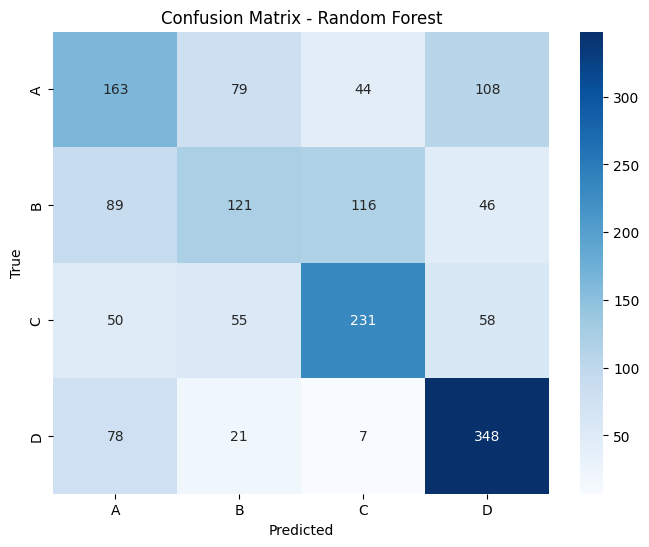

Predictions saved to test_data_with_predictions.csv

[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   4.9s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   4.2s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   3.7s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   4.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.5s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   3.8s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   4.7s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=20, min_samples_

In [242]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Step 2: Load the dataset
tr_data = pd.read_csv("/kaggle/input/moveinsync/train2.csv") 
te_data = pd.read_csv("/kaggle/input/moveinsync/test2.csv")

# Drop ID column
tr_data = tr_data.drop(columns=["ID"])
te_data = te_data.drop(columns=["ID"])

# Step 3: Separate target and features
y = tr_data['Segmentation']  # Target variable
X = tr_data.drop(columns=['Segmentation'])  # Feature variables

# Step 4: Handle Missing Values
numerical_cols = X.select_dtypes(include=["float64", "int64"]).columns
categorical_cols = X.select_dtypes(include=["object"]).columns

imputer_num = SimpleImputer(strategy="median")  
imputer_cat = SimpleImputer(strategy="most_frequent")

# Impute missing values in training features
X[numerical_cols] = imputer_num.fit_transform(X[numerical_cols])
X[categorical_cols] = imputer_cat.fit_transform(X[categorical_cols])

# Apply imputations to the test dataset
te_data[numerical_cols] = imputer_num.transform(te_data[numerical_cols])
te_data[categorical_cols] = imputer_cat.transform(te_data[categorical_cols])

print("Missing values handled successfully!")

# Step 5: Encode Categorical Features
# One-Hot Encoding for categorical features
ohe = OneHotEncoder(sparse=False, drop='first')
X_ohe = ohe.fit_transform(X[categorical_cols])
te_data_ohe = ohe.transform(te_data[categorical_cols])

# Convert encoded columns back to DataFrame
ohe_columns = ohe.get_feature_names_out(categorical_cols)
X_ohe_df = pd.DataFrame(X_ohe, columns=ohe_columns, index=X.index)
te_data_ohe_df = pd.DataFrame(te_data_ohe, columns=ohe_columns, index=te_data.index)

# Combine numerical and encoded features
X = pd.concat([X[numerical_cols], X_ohe_df], axis=1)
te_data = pd.concat([te_data[numerical_cols], te_data_ohe_df], axis=1)

print("One-Hot Encoding applied successfully!")

# Step 6: Scale Numerical Features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
te_data[numerical_cols] = scaler.transform(te_data[numerical_cols])

print("Scaling completed successfully!")

# Step 7: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 8: Encode Target Variable
label_enc = LabelEncoder()
y_train_encoded = label_enc.fit_transform(y_train)
y_test_encoded = label_enc.transform(y_test)

# Step 9: Train Random Forest with Hyperparameter Tuning
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
random_search_rf = RandomizedSearchCV(rf_model, param_dist_rf, n_iter=20, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)
random_search_rf.fit(X_train, y_train_encoded)

# Best Parameters and Accuracy
print("Random Forest Best Parameters:", random_search_rf.best_params_)
print("Random Forest Training Accuracy:", random_search_rf.best_score_)

# Step 10: Test the Model
best_rf = random_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_pred_rf_decoded = label_enc.inverse_transform(y_pred_rf)

print("Random Forest Testing Accuracy:", accuracy_score(y_test, y_pred_rf_decoded))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_decoded))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf_decoded)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Step 11: Predict on Test Data
te_predictions = best_rf.predict(te_data)
te_predictions_decoded = label_enc.inverse_transform(te_predictions)

# Save Predictions
te_data['Predicted_Segmentation'] = te_predictions_decoded
te_data.to_csv("test_data_with_predictions.csv", index=False)
print("Predictions saved to test_data_with_predictions.csv")
